In [12]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from operator import itemgetter
import sklearn
import matplotlib.colors as colors
from sklearn.cluster import MeanShift
from itertools import cycle
from scipy import ndimage

In [13]:
c =0.299792458
n =1.3195
v=c/n 
print(v)

0.2272015596816976


In [14]:
info_d = []
info_s = []
data_d = []
data_s = []

for i in range(0,1):
    name_dd = "../data/Tau05to15PeV_{0}_data.npy".format(i)
    name_di = "../data/Tau05to15PeV_{0}_info.pkl".format(i)
    name_sd = "../data/Electron05to15PeV_{0}_data.npy".format(i)
    name_si = "../data/Electron05to15PeV_{0}_info.pkl".format(i)
    info_d_temp = pickle.load(open(name_di, "rb"))
    info_s_temp = pickle.load(open(name_si, "rb"))
    data_d_temp = np.load(name_dd ,allow_pickle=True,encoding='bytes')
    data_s_temp = np.load(name_sd ,allow_pickle=True,encoding='bytes')
    info_d = info_d + info_d_temp
    info_s = info_s + info_s_temp
    data_d.append(data_d_temp)    
    data_s.append(data_s_temp)
data_d = np.vstack(data_d)
data_s = np.vstack(data_s)

In [17]:
print(len(info_d), len(data_d))
print(len(info_s), len(data_s))
print(type(data_d_temp[0][0][0]))

985 985
2367 2367
<class 'numpy.float64'>


(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)


/home/dup193/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)
(600, 60)


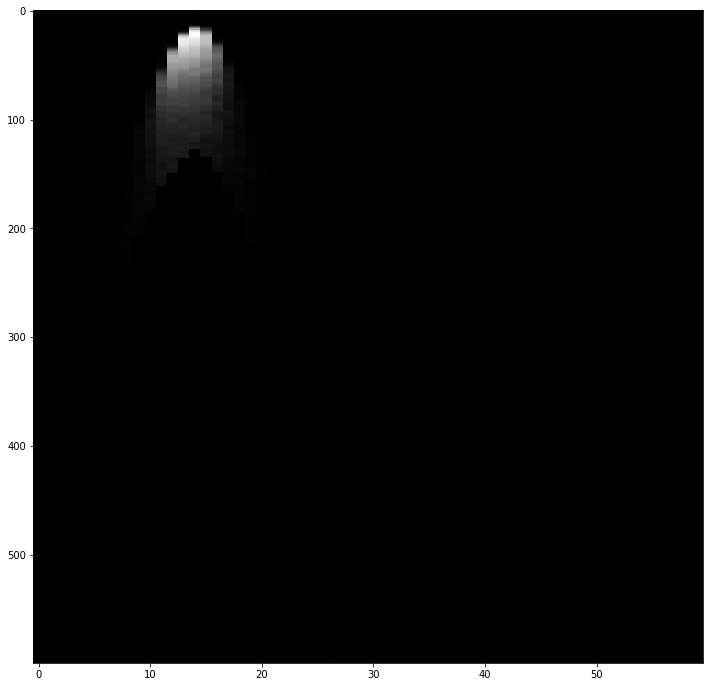

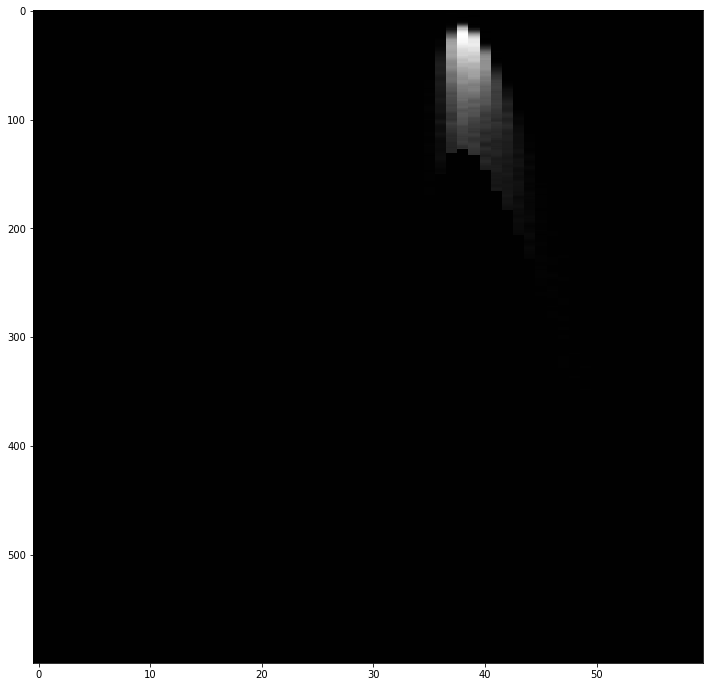

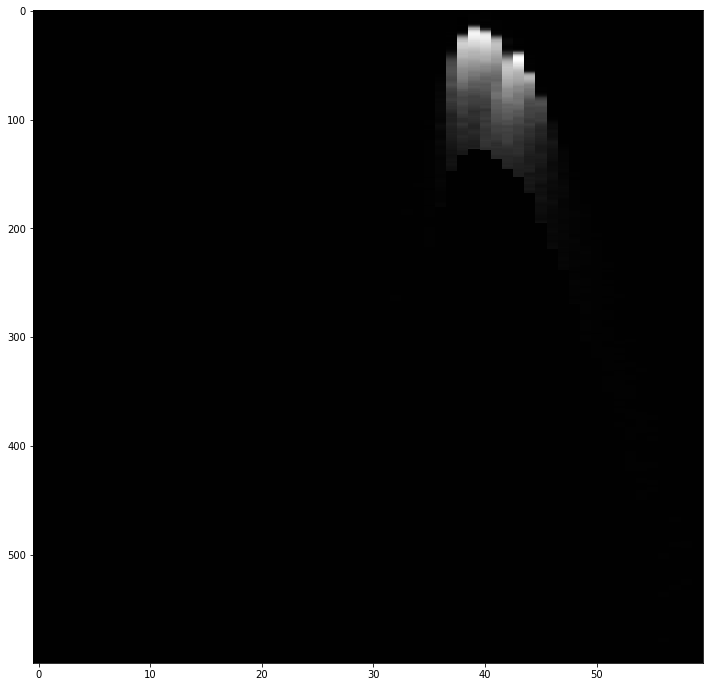

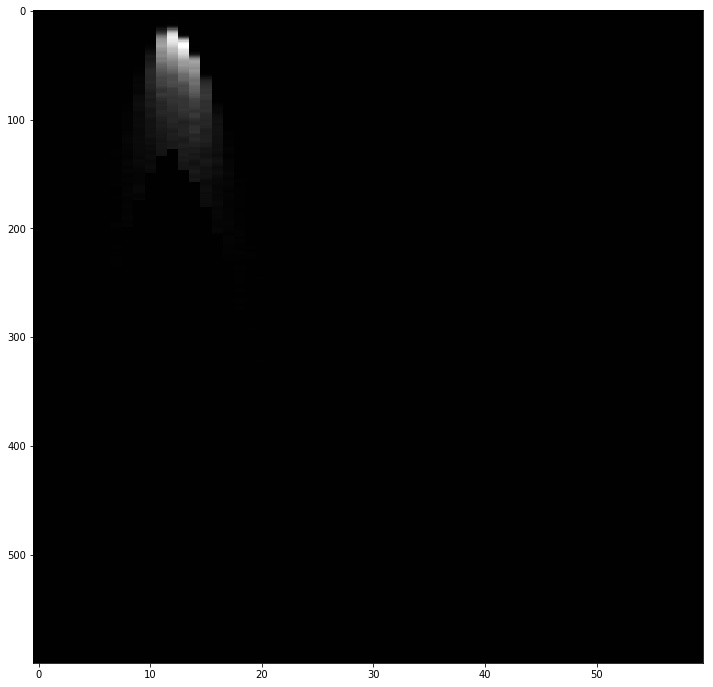

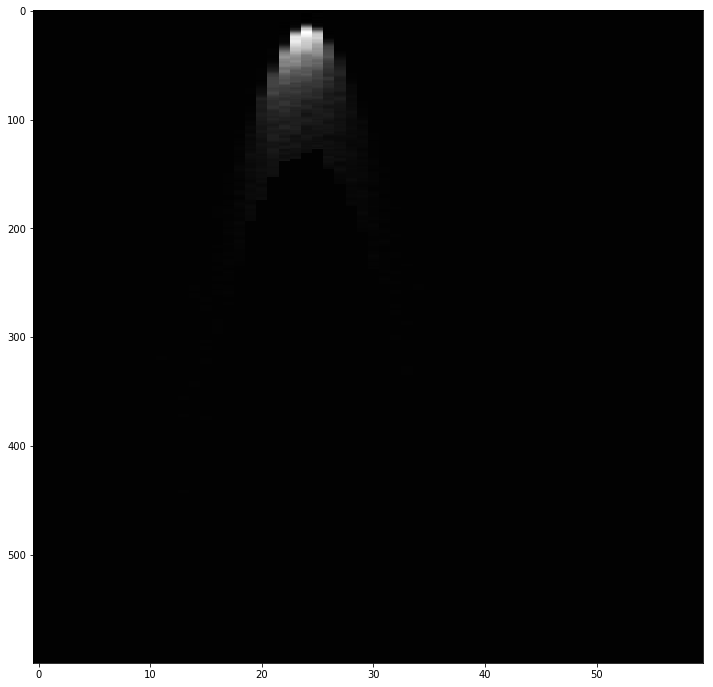

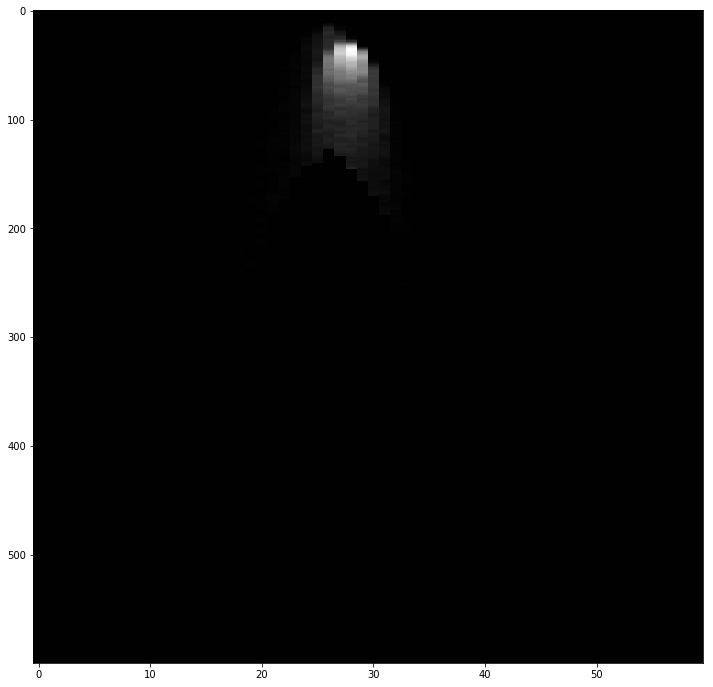

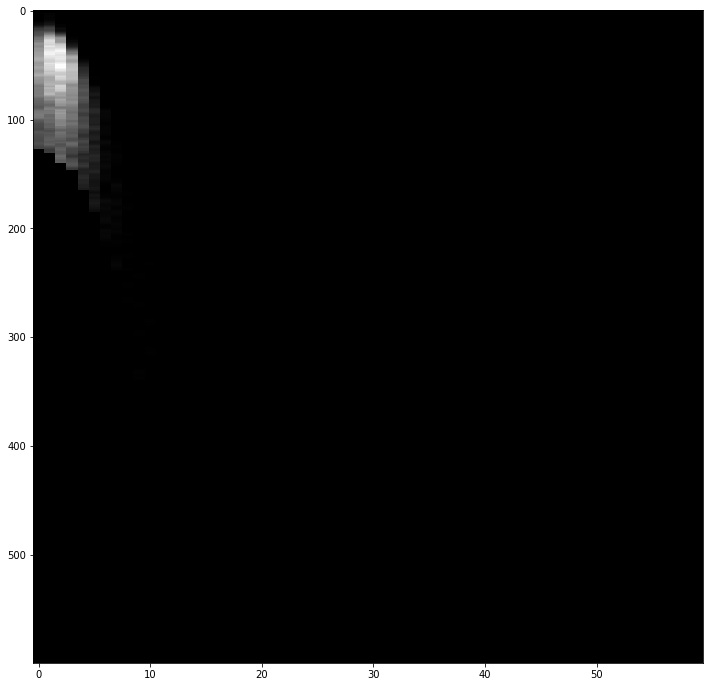

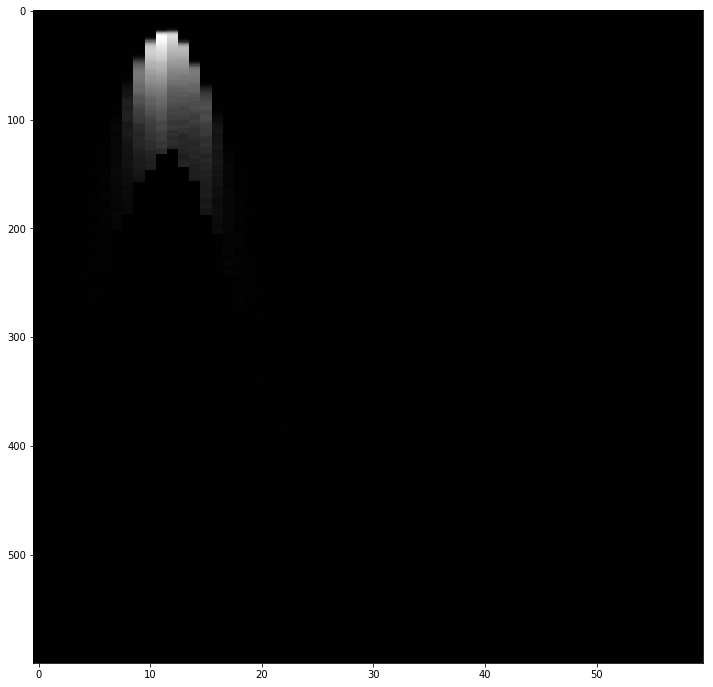

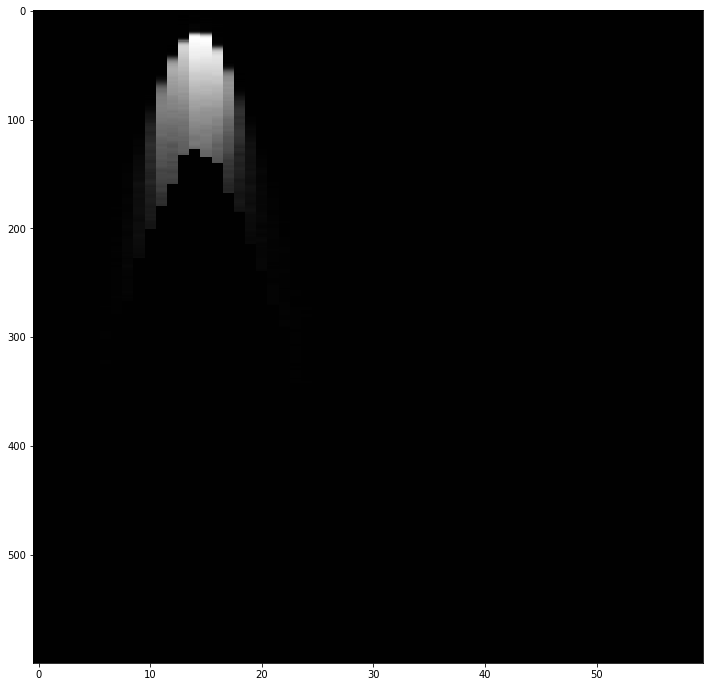

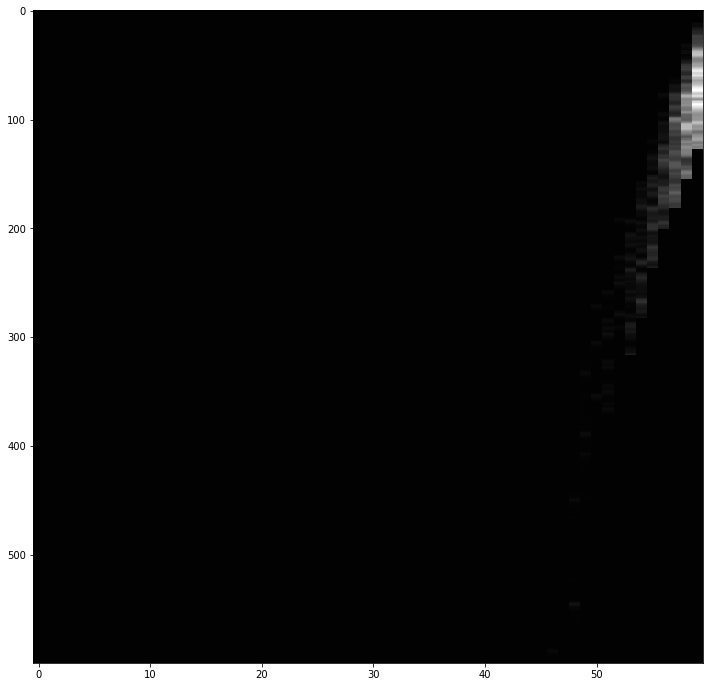

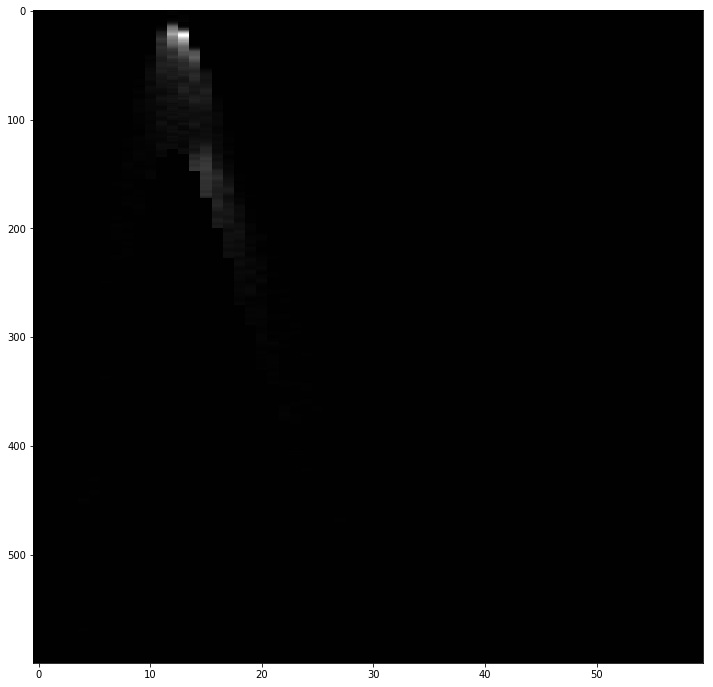

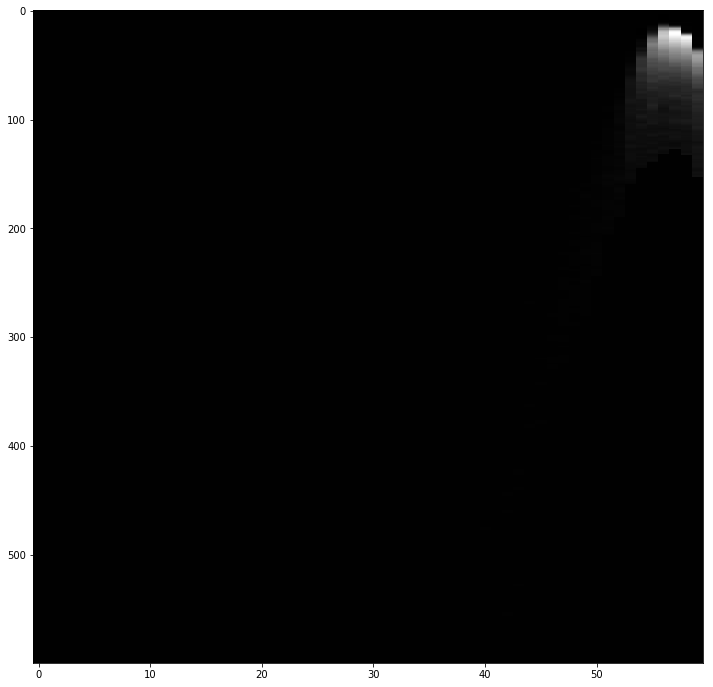

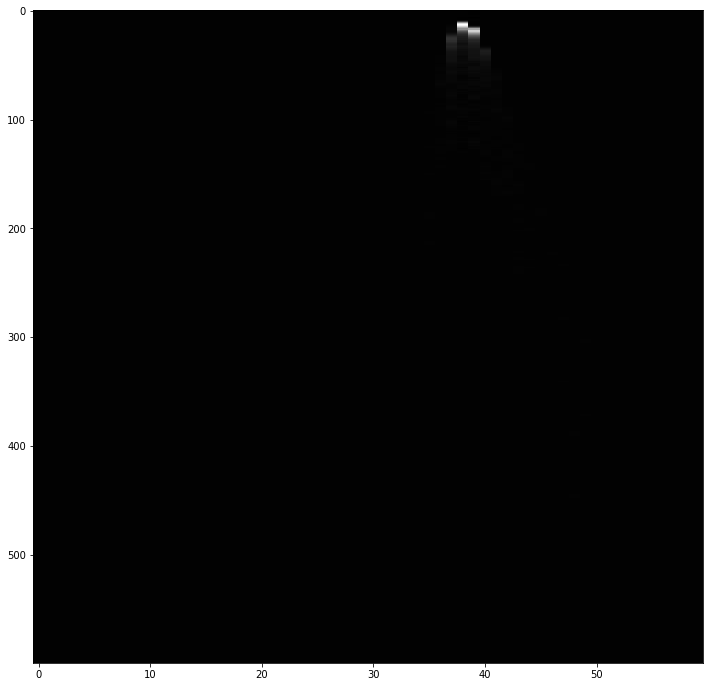

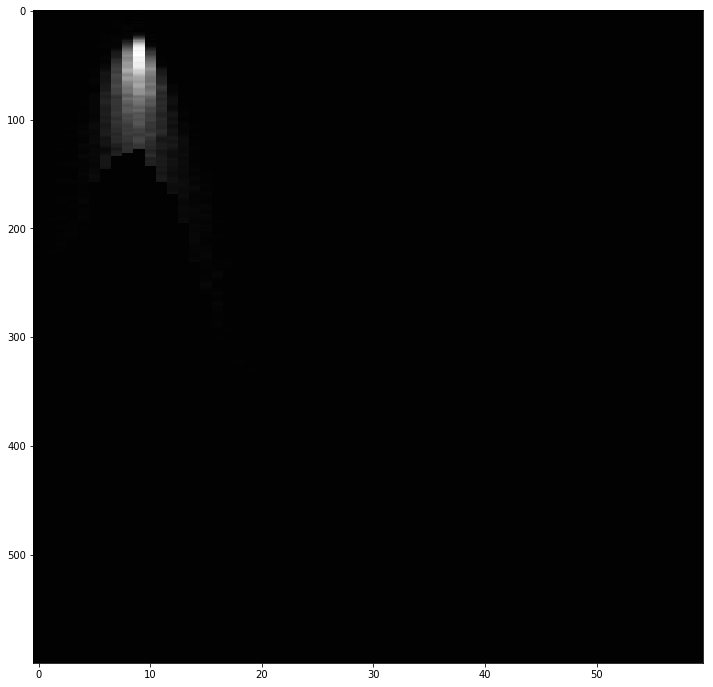

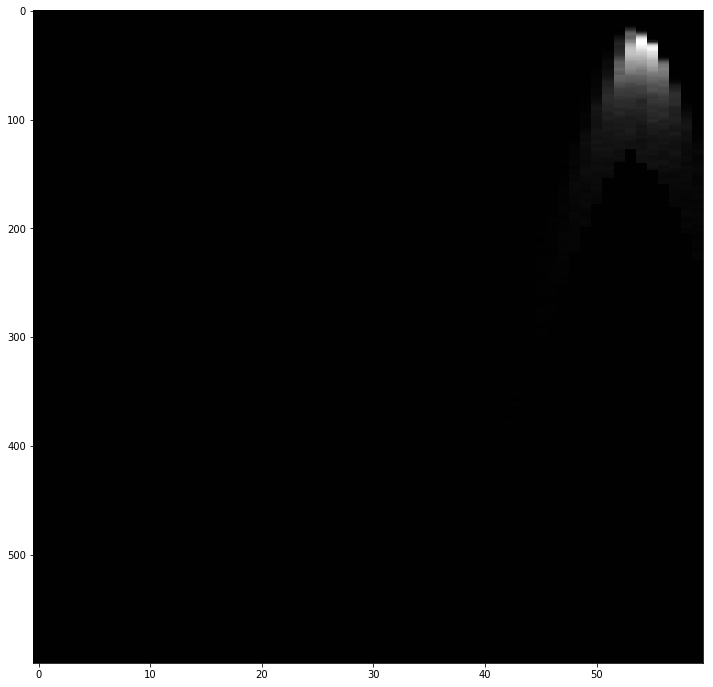

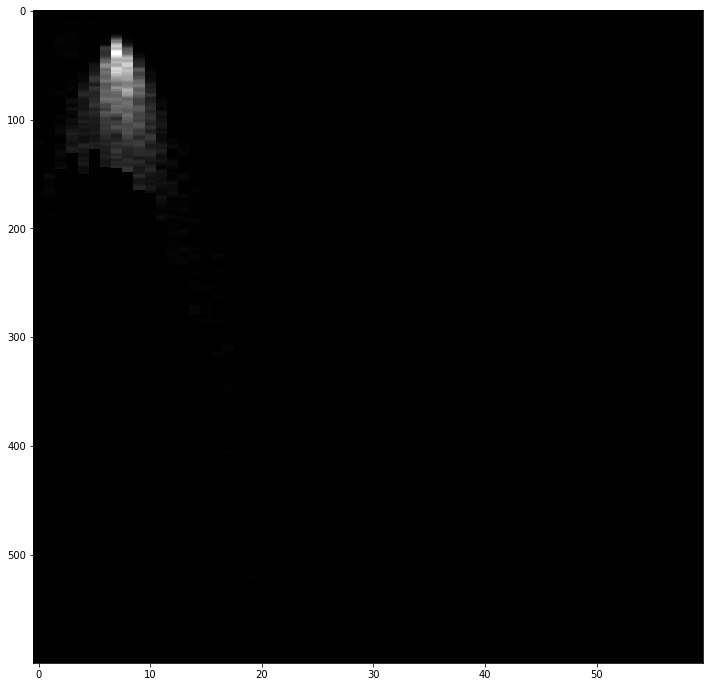

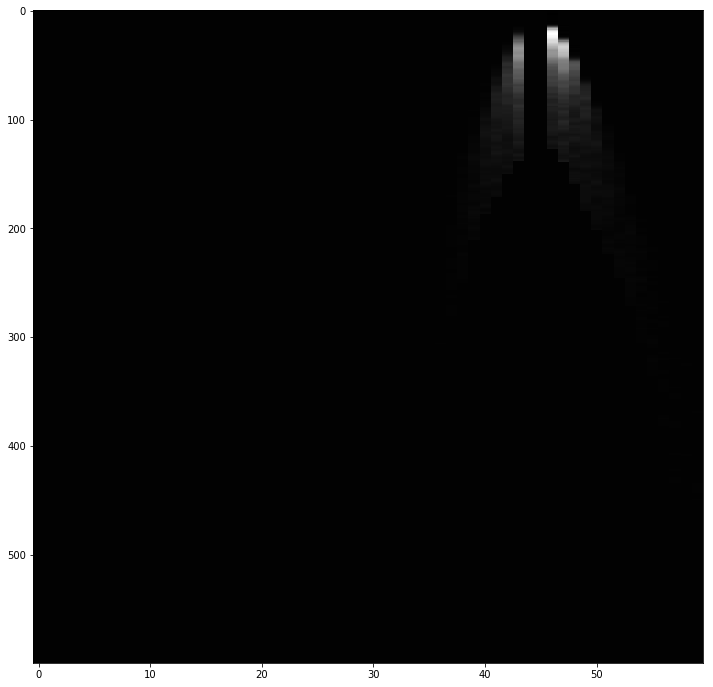

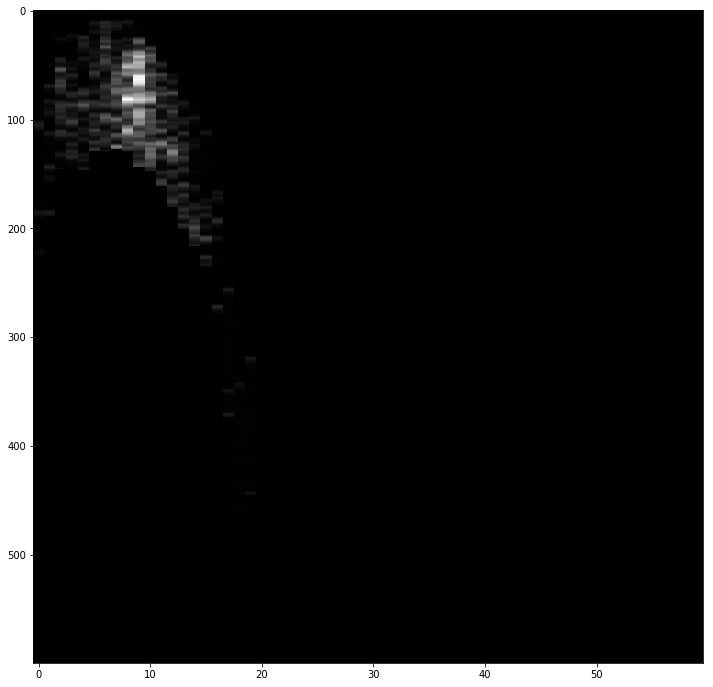

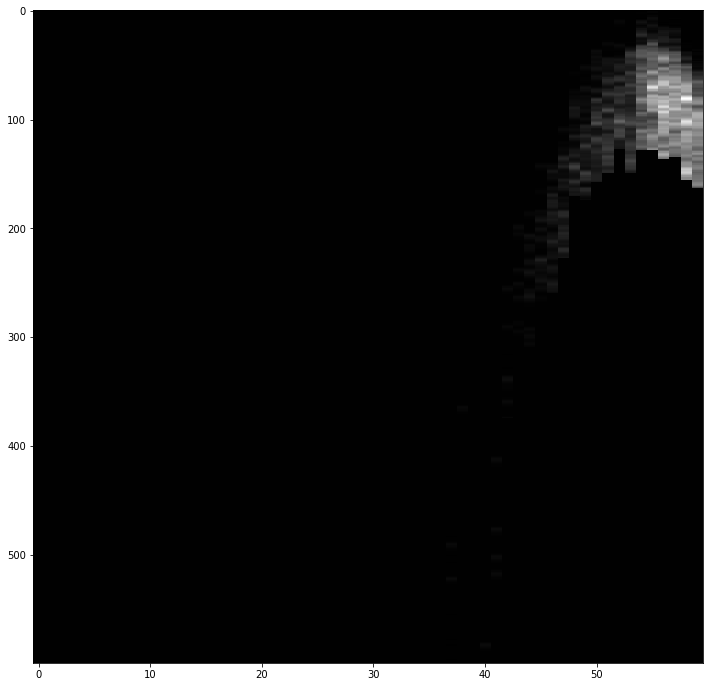

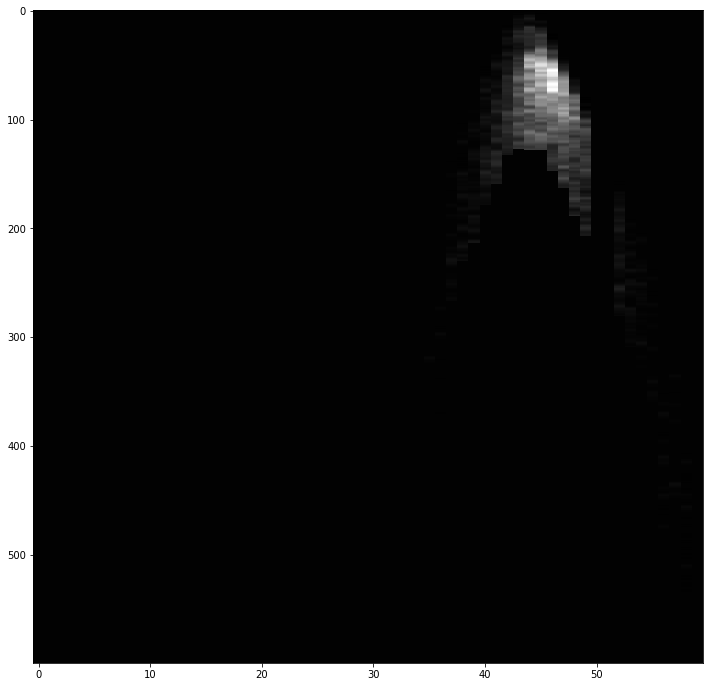

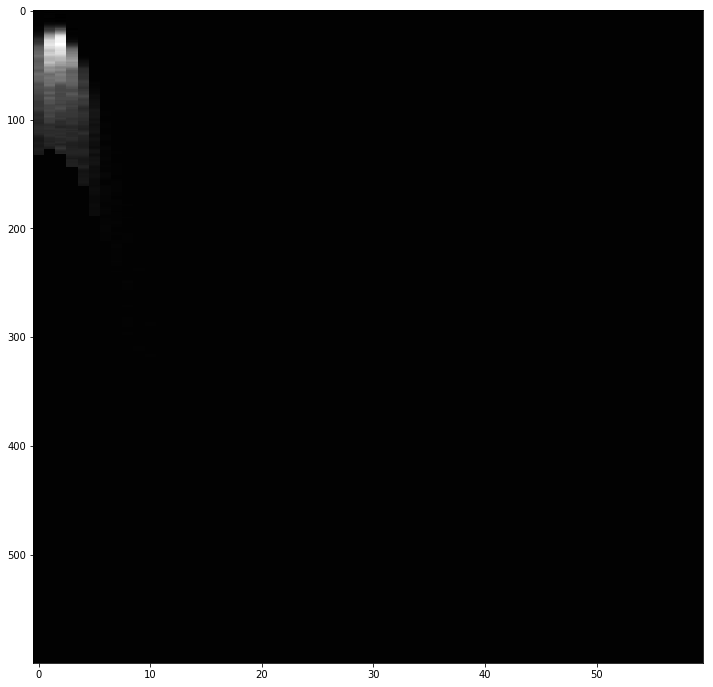

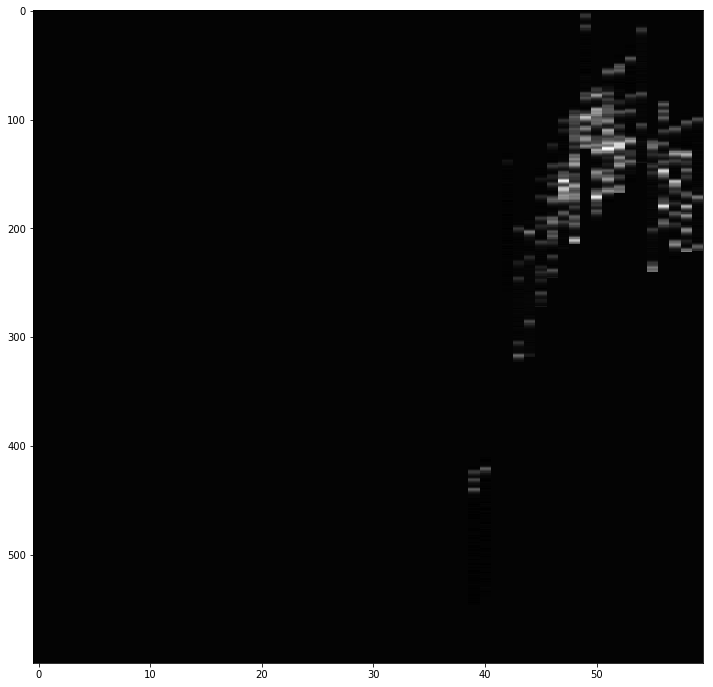

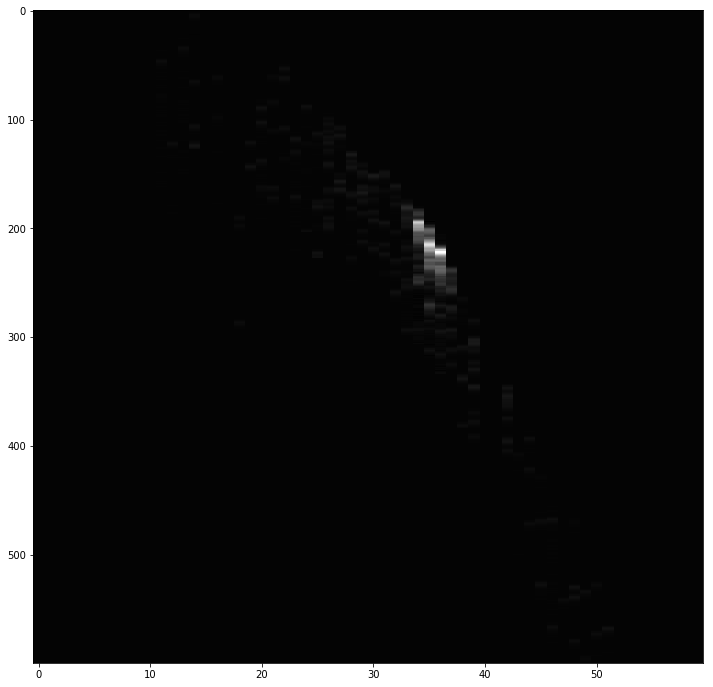

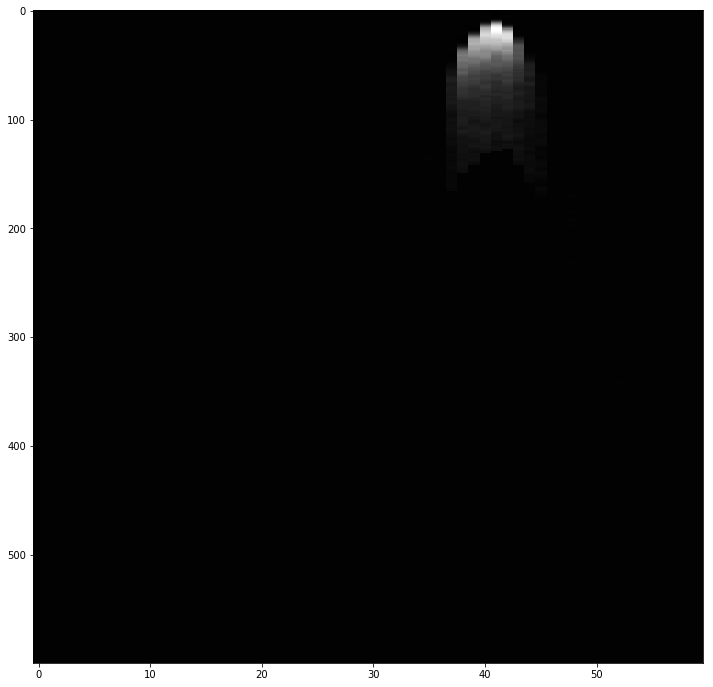

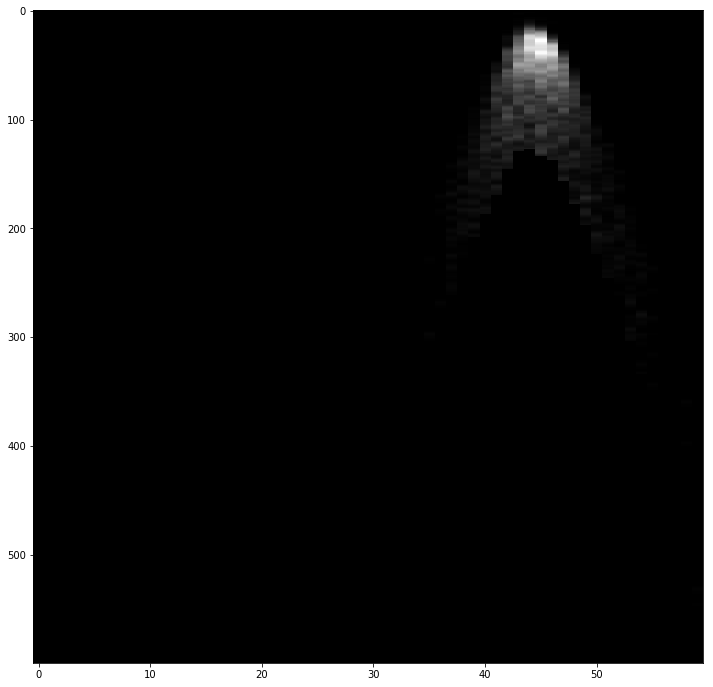

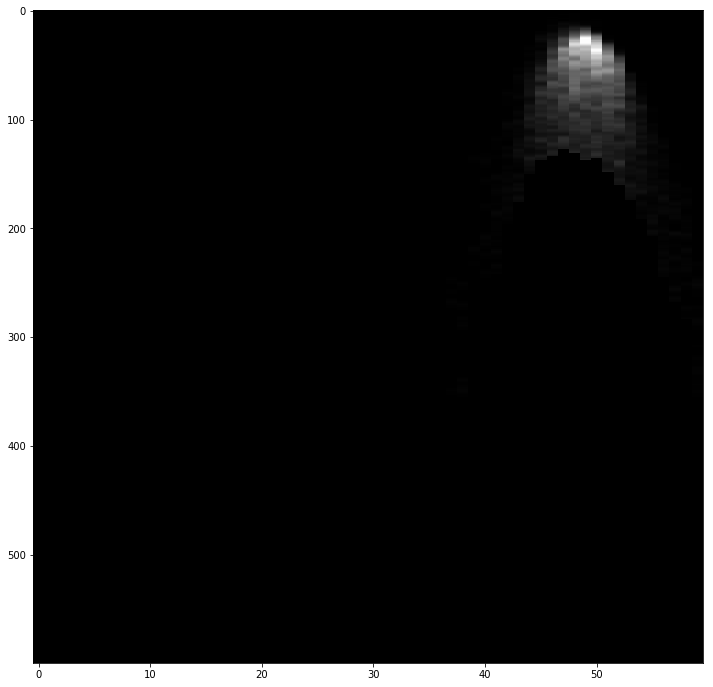

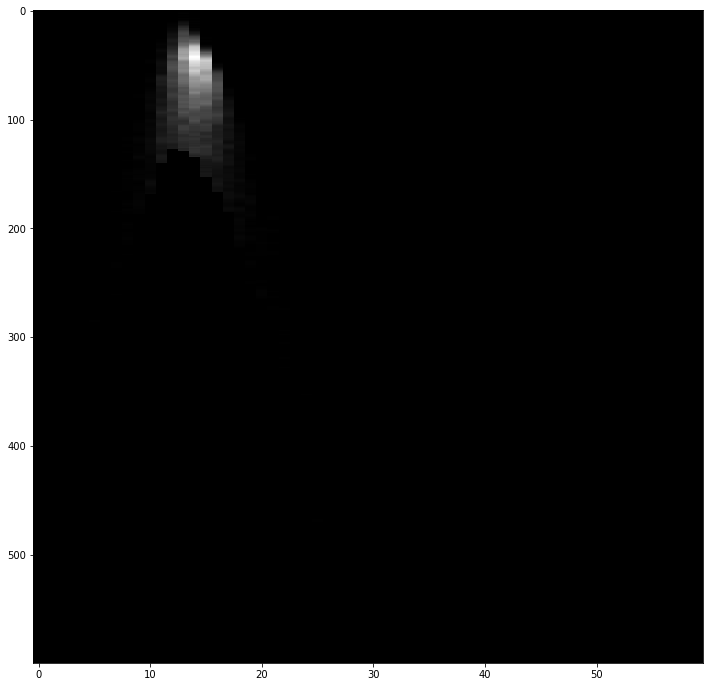

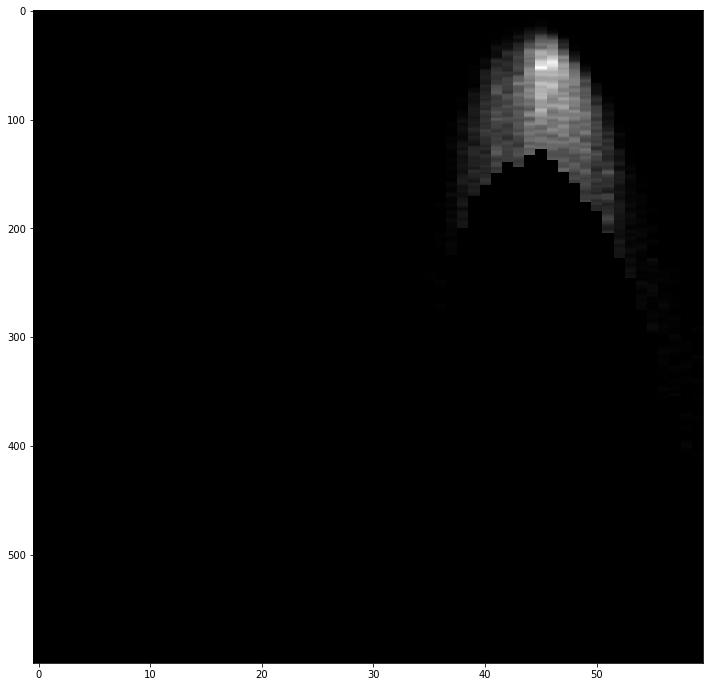

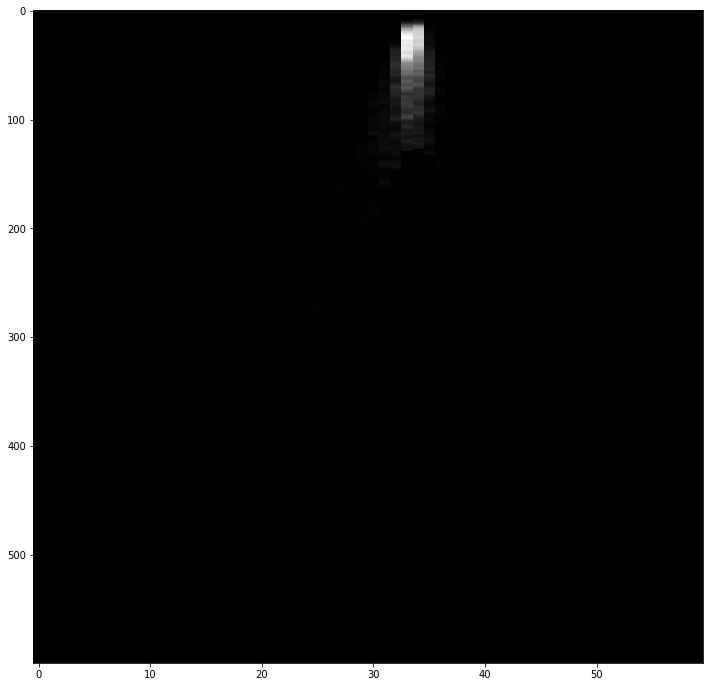

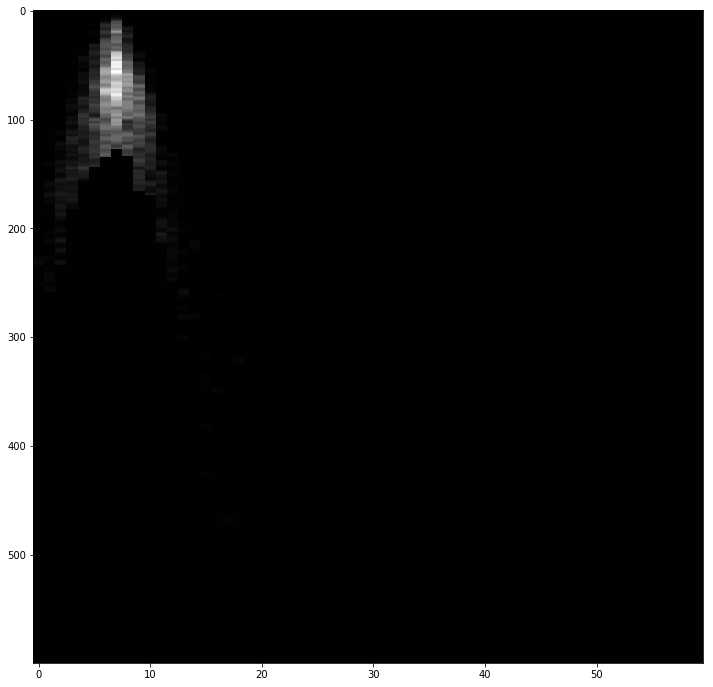

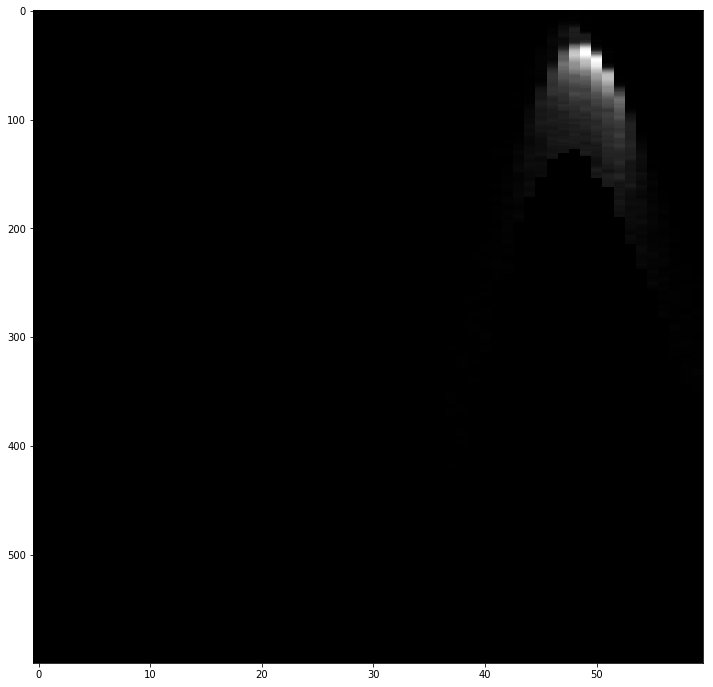

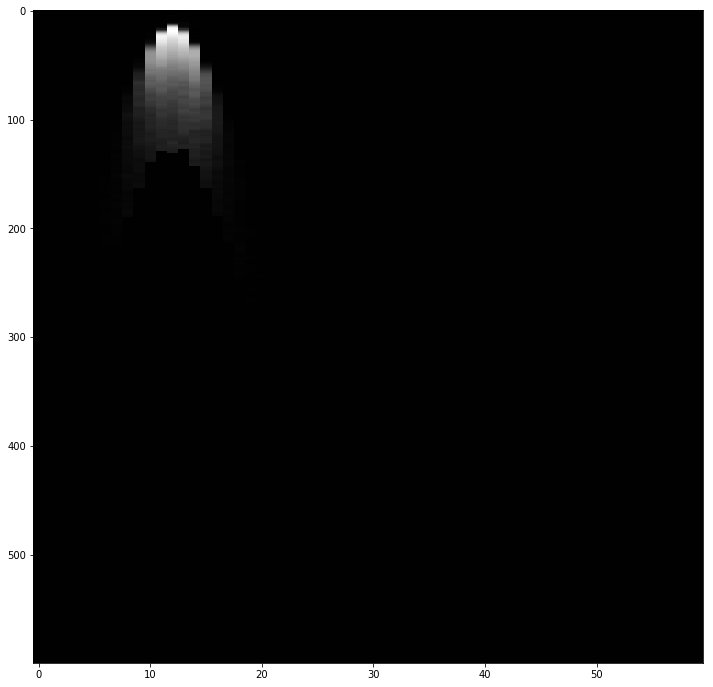

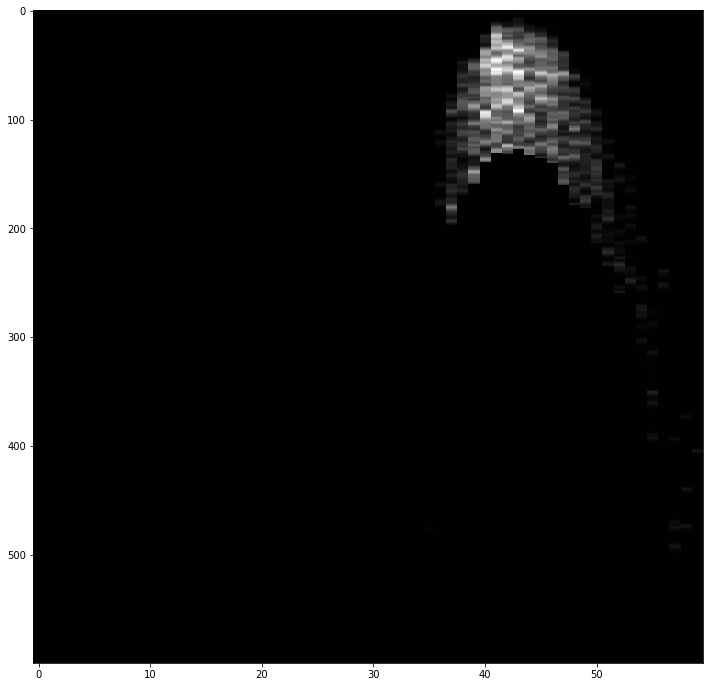

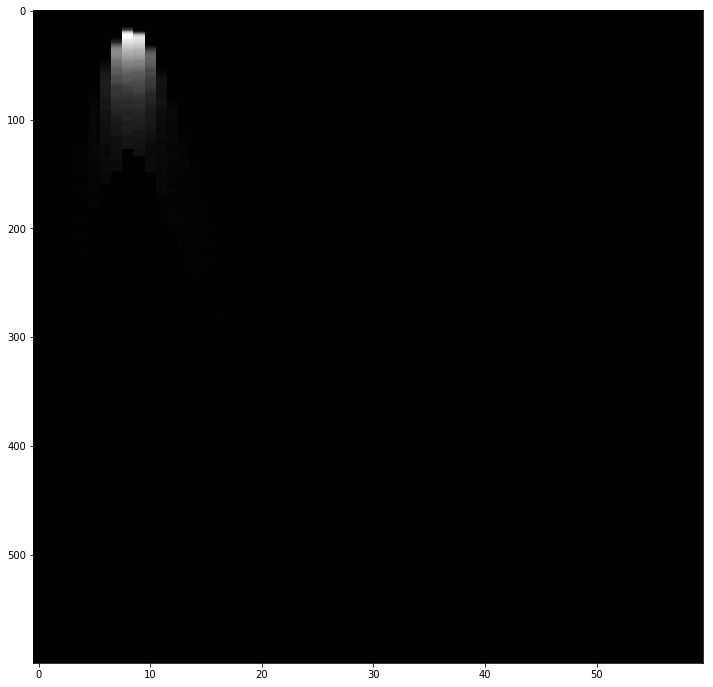

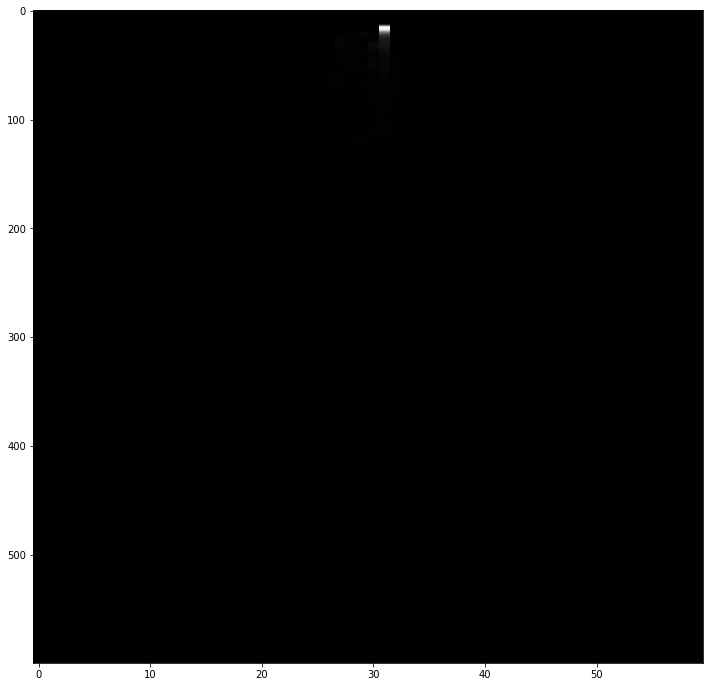

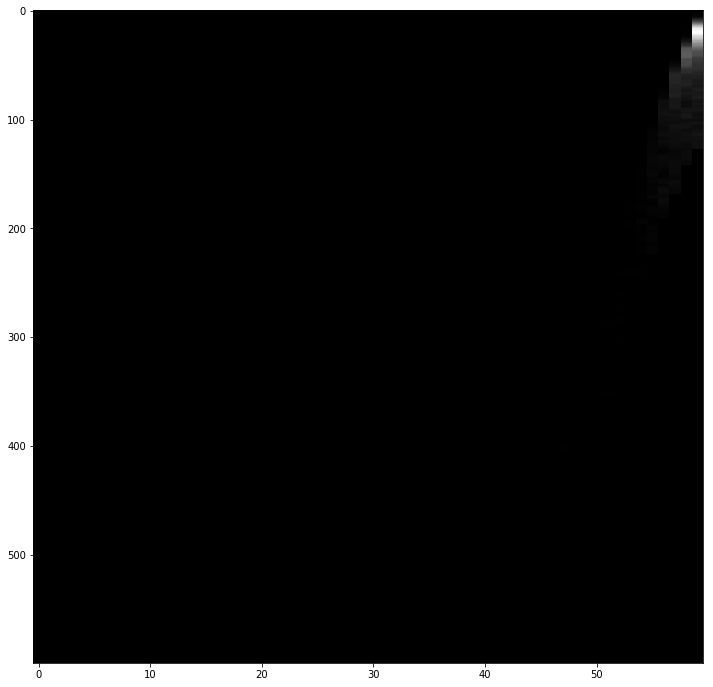

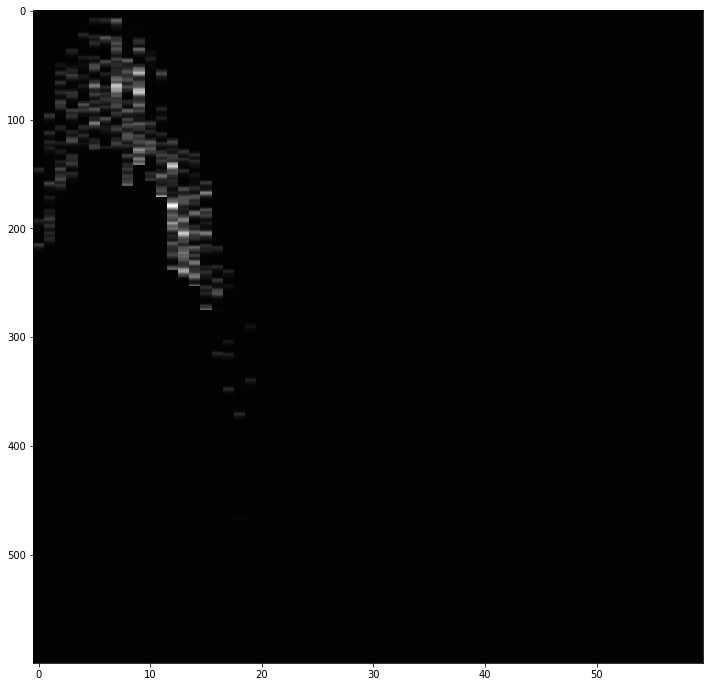

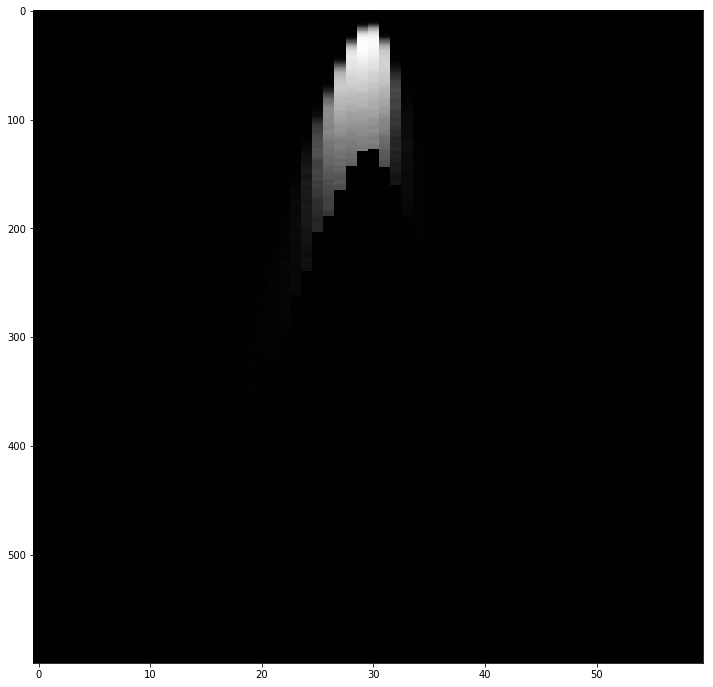

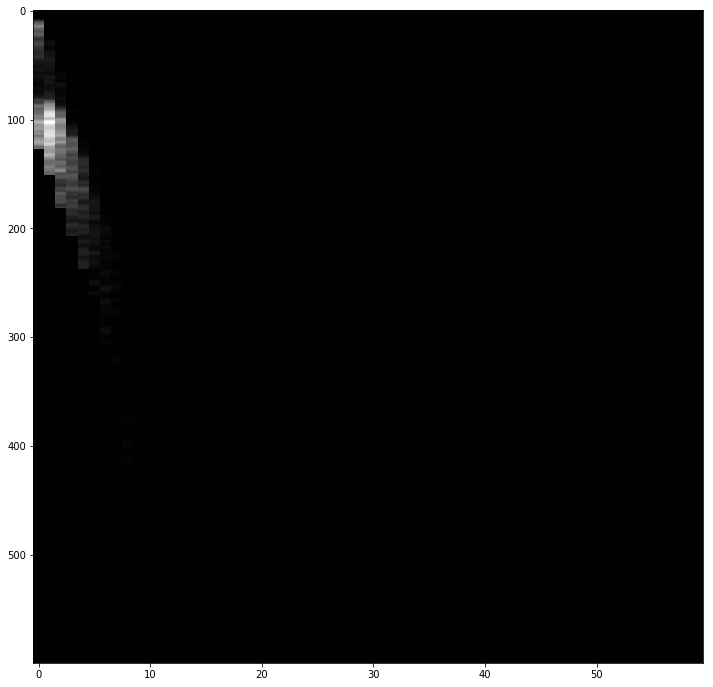

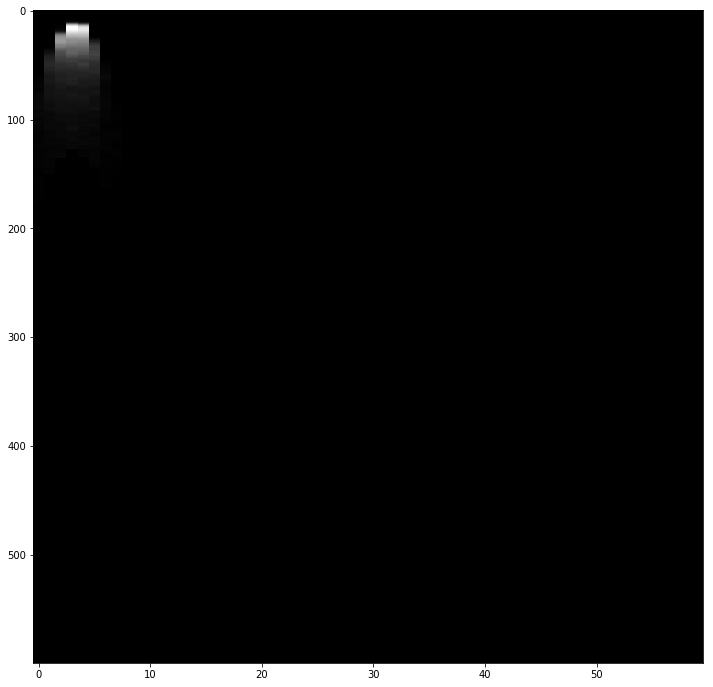

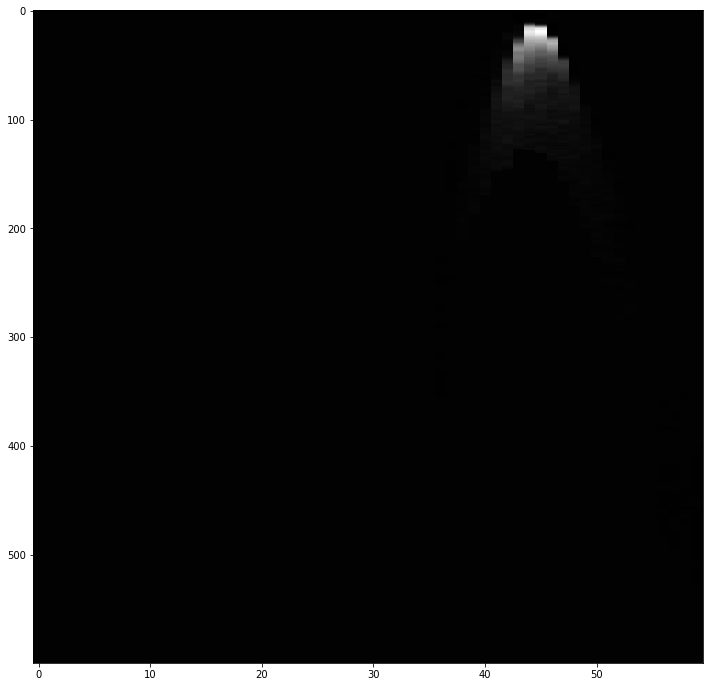

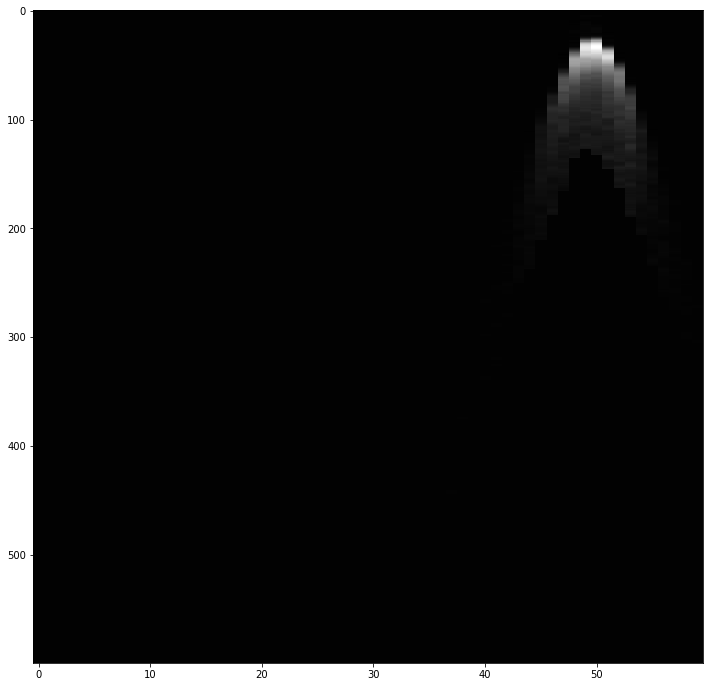

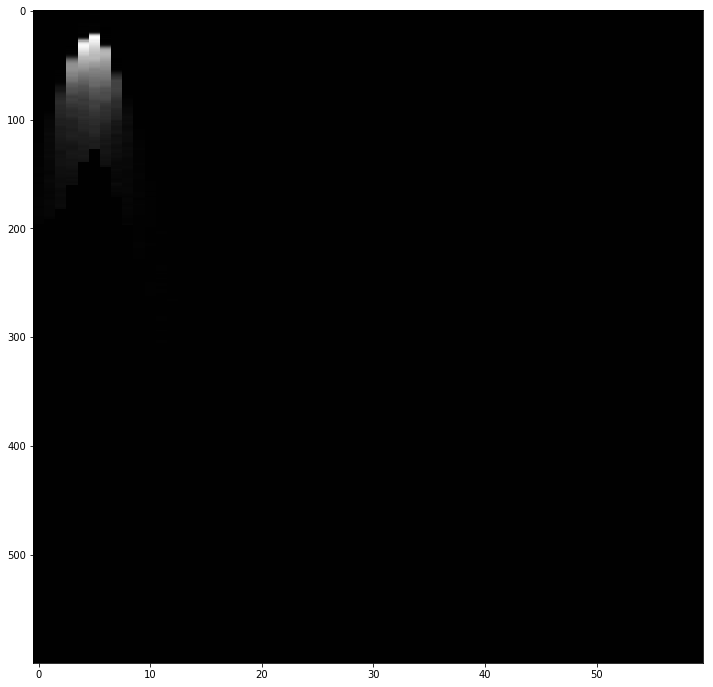

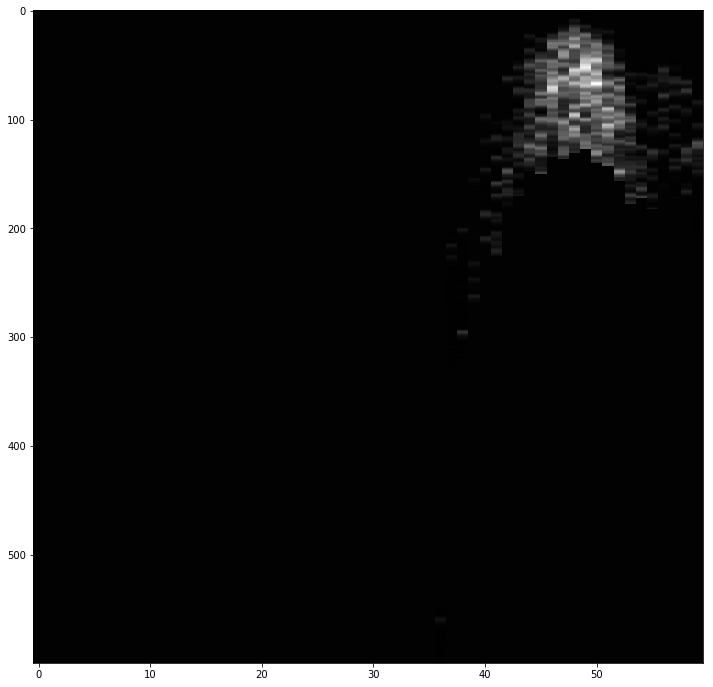

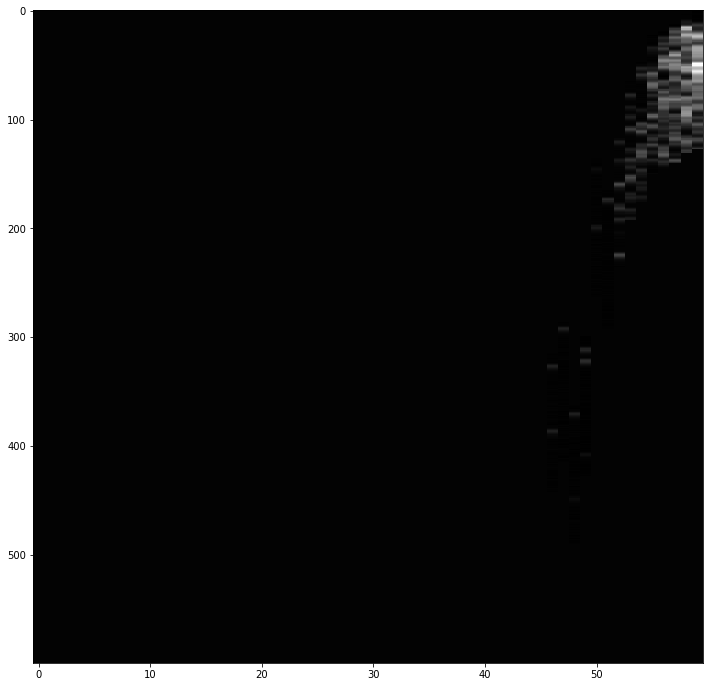

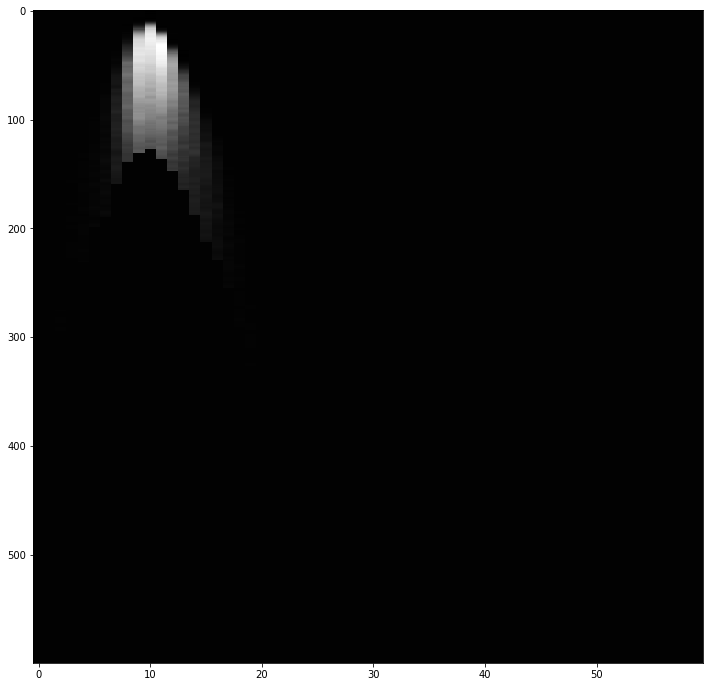

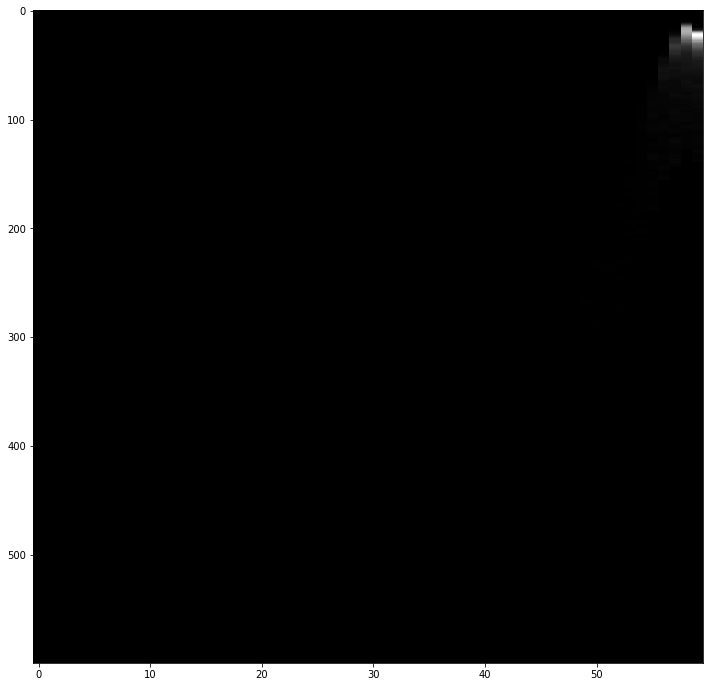

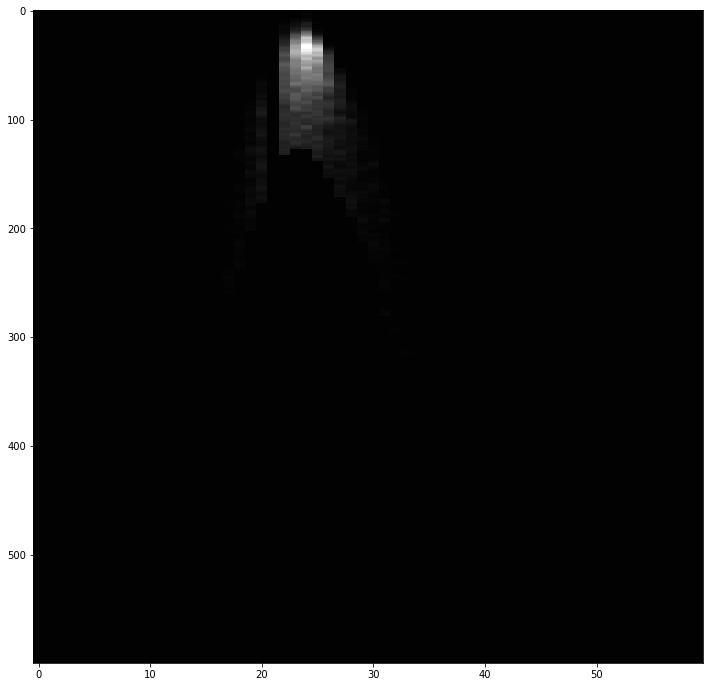

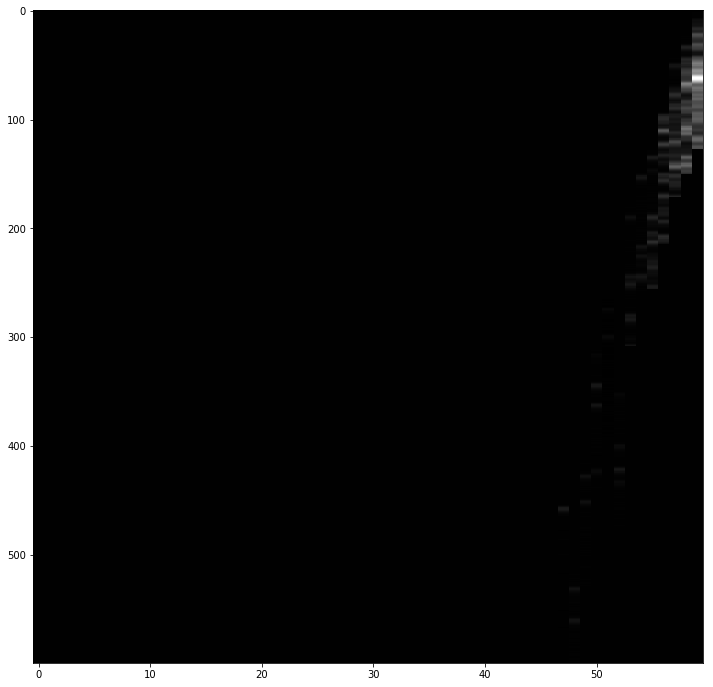

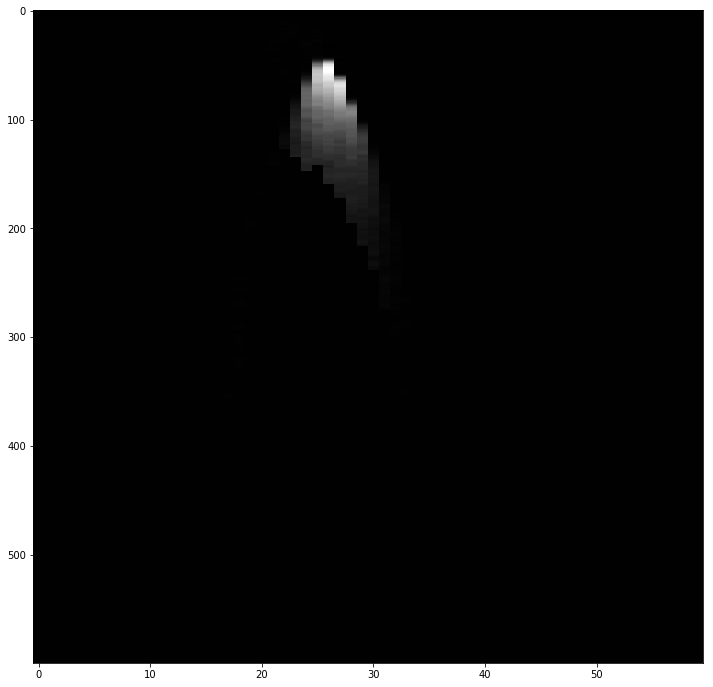

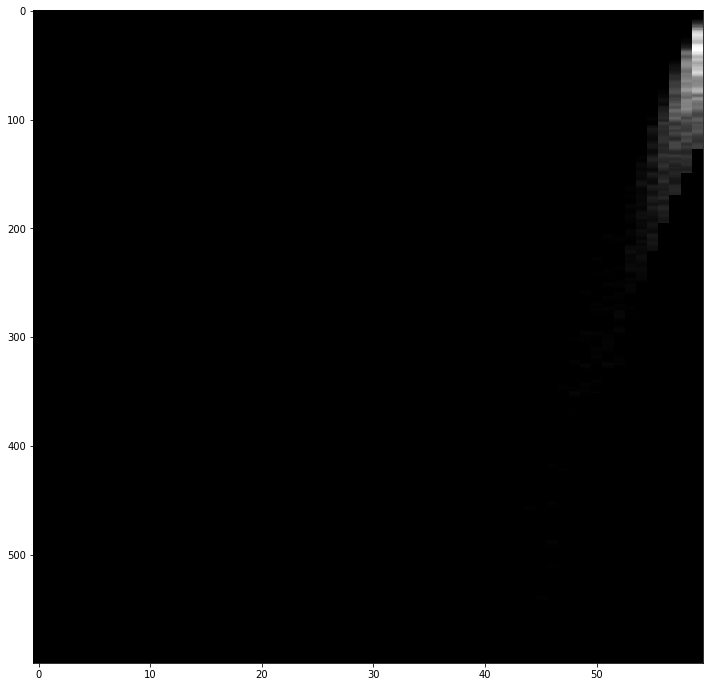

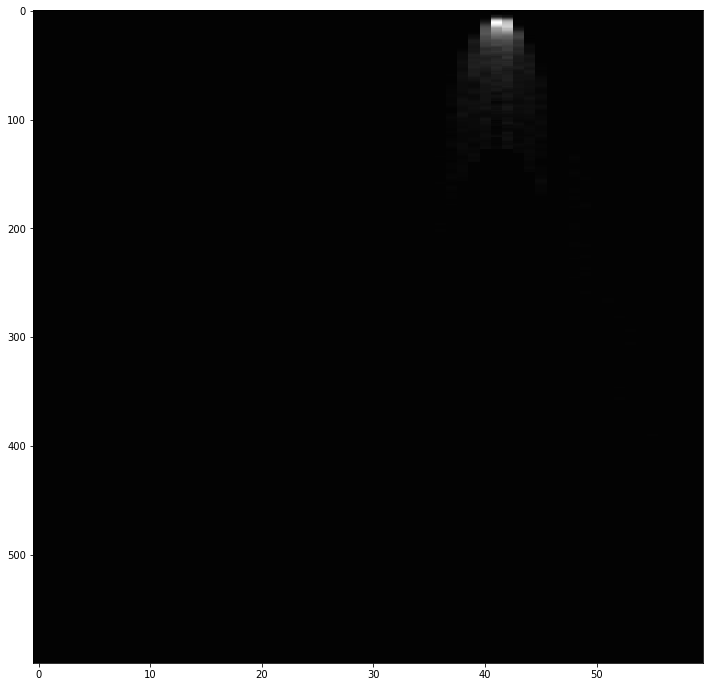

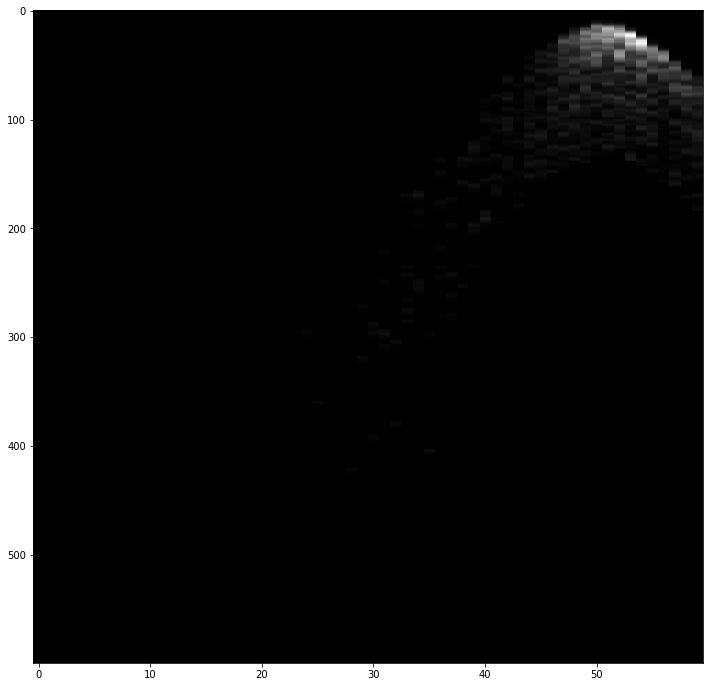

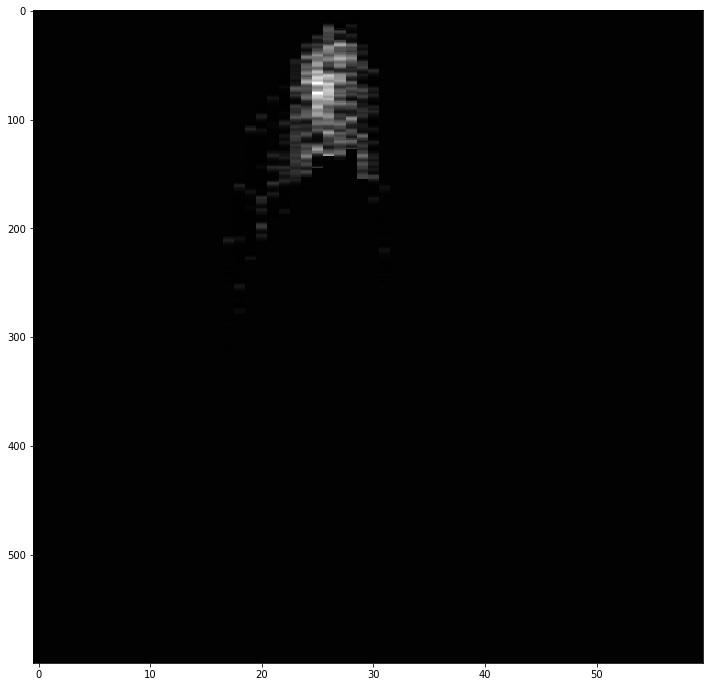

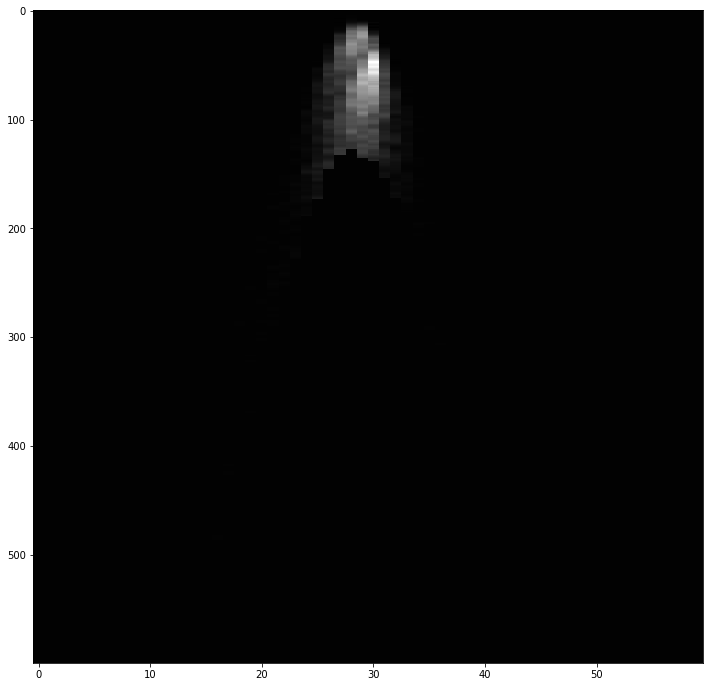

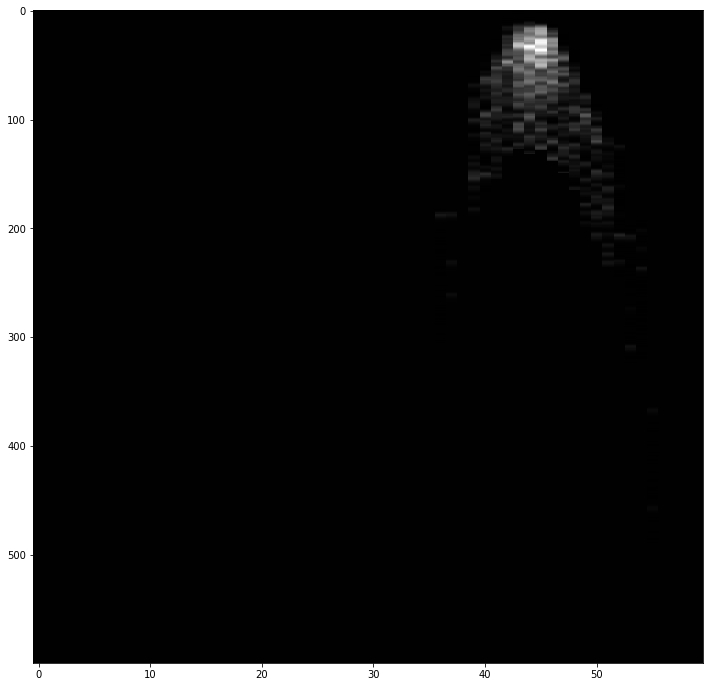

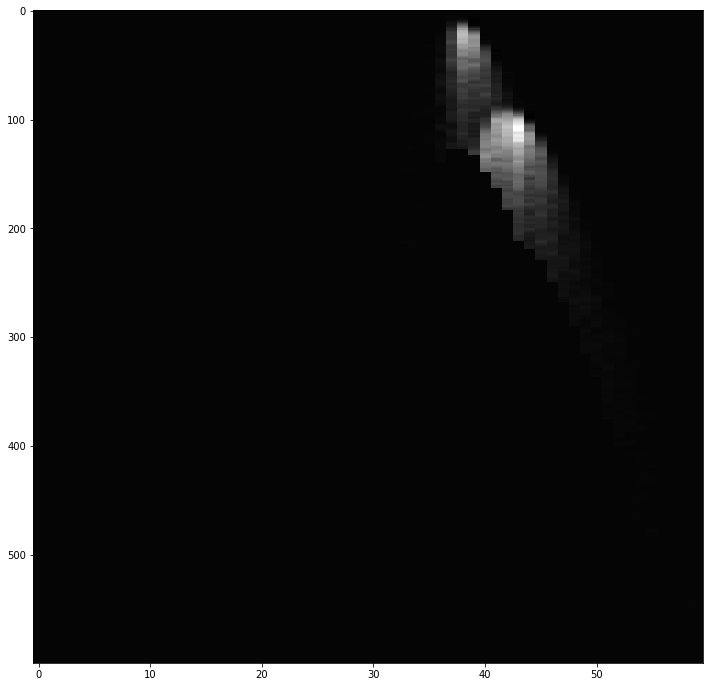

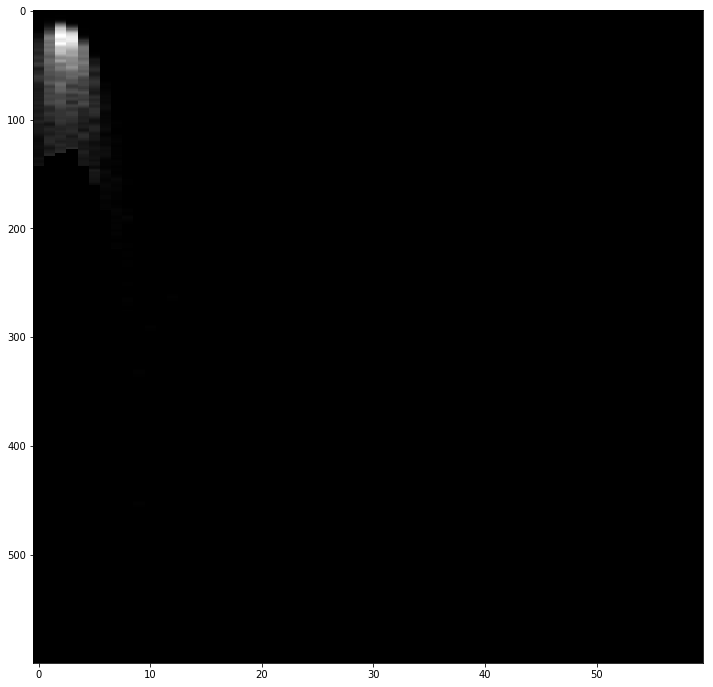

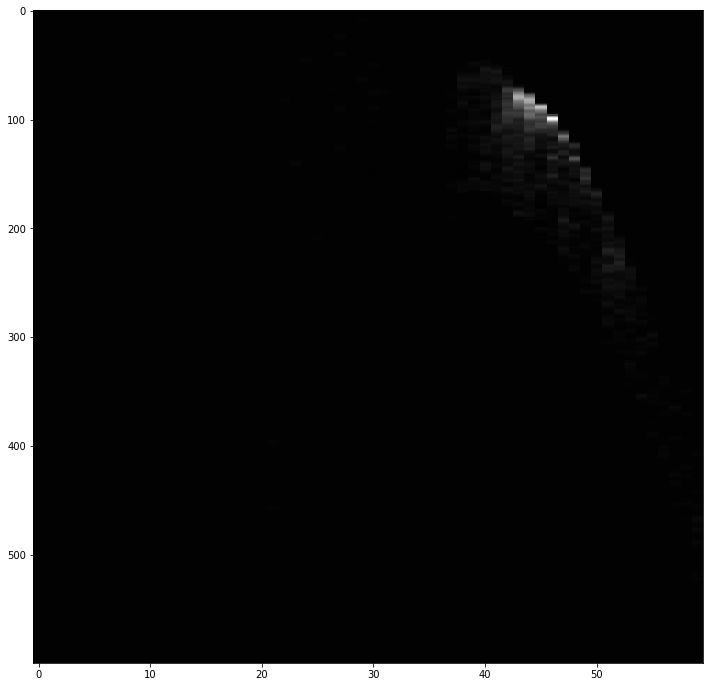

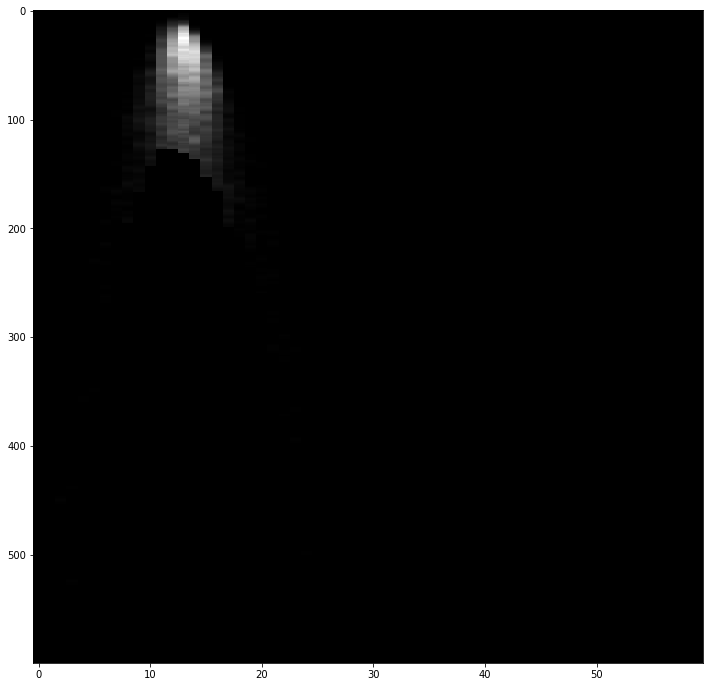

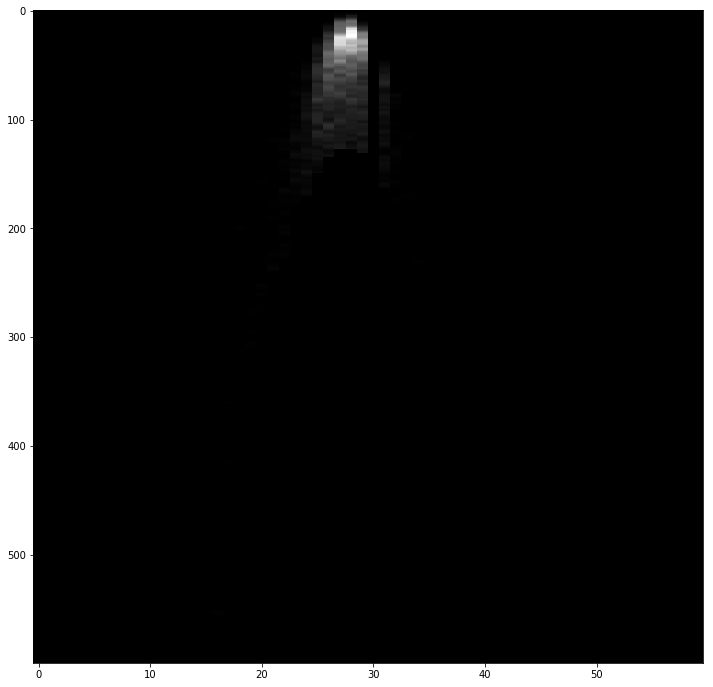

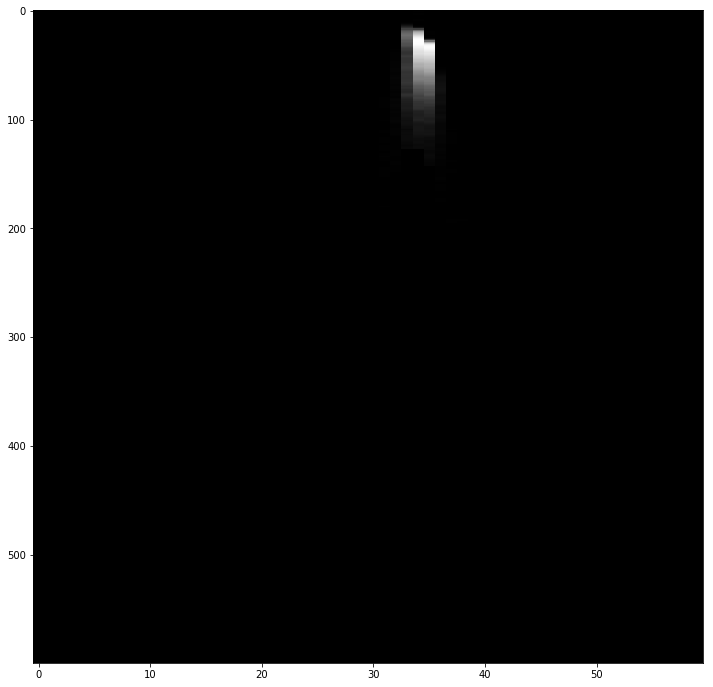

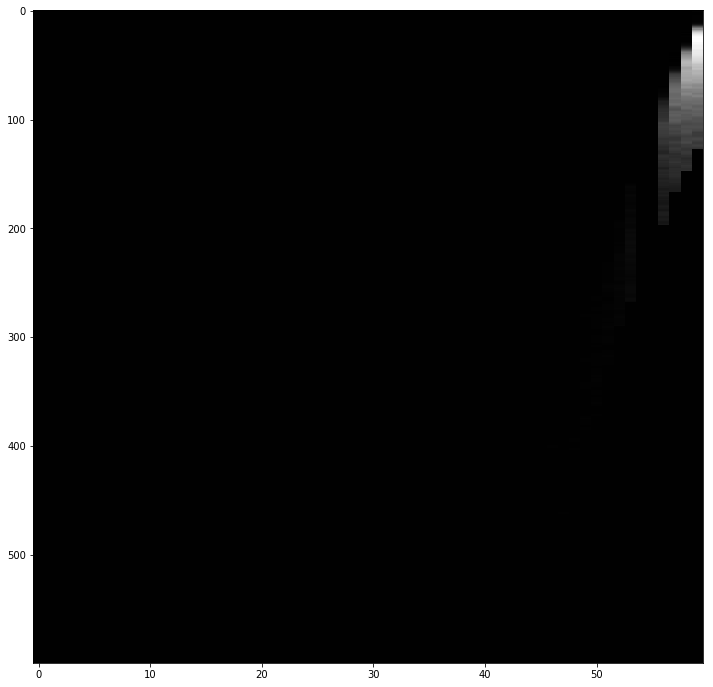

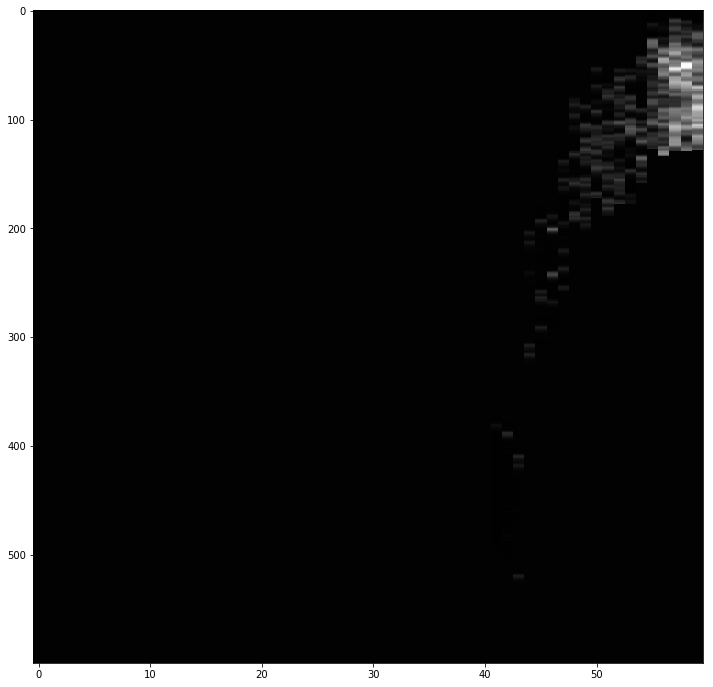

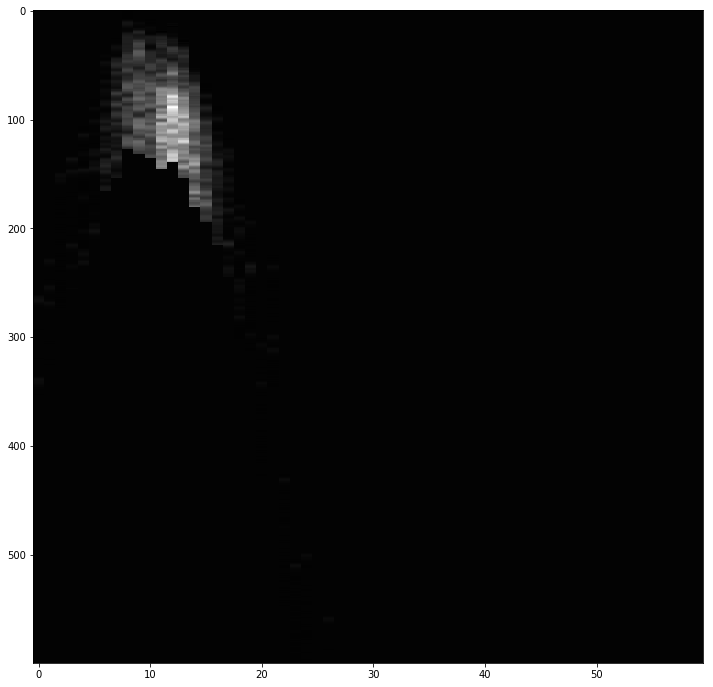

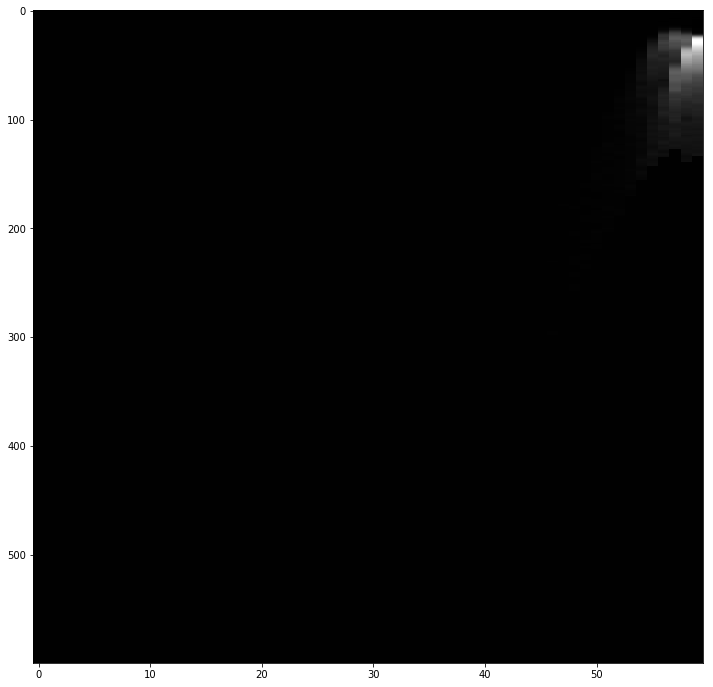

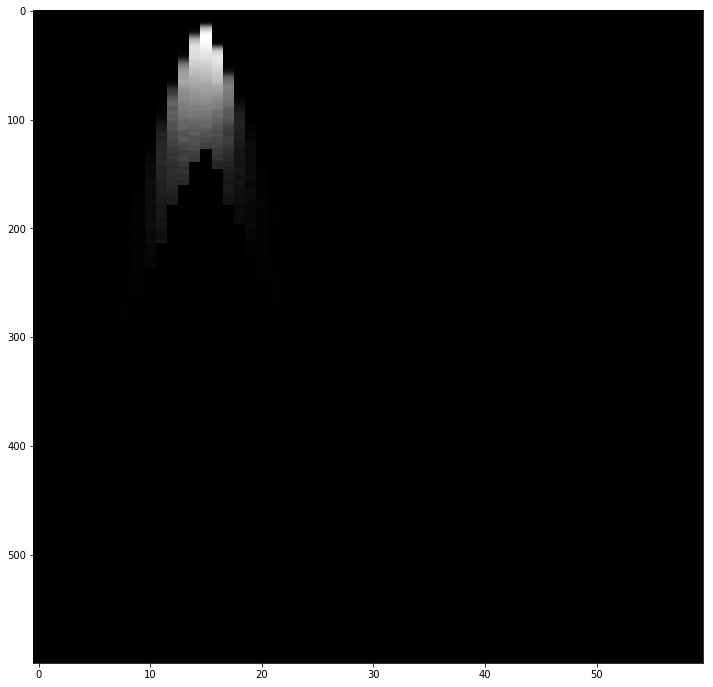

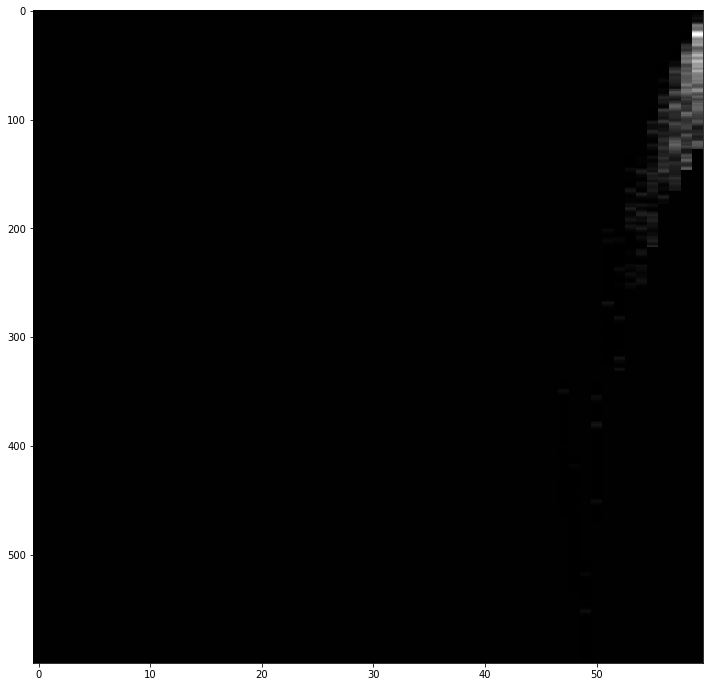

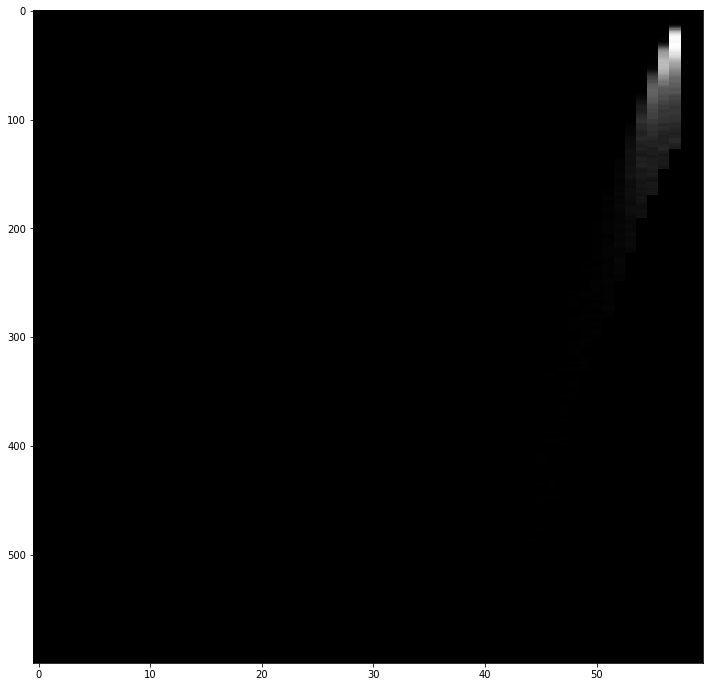

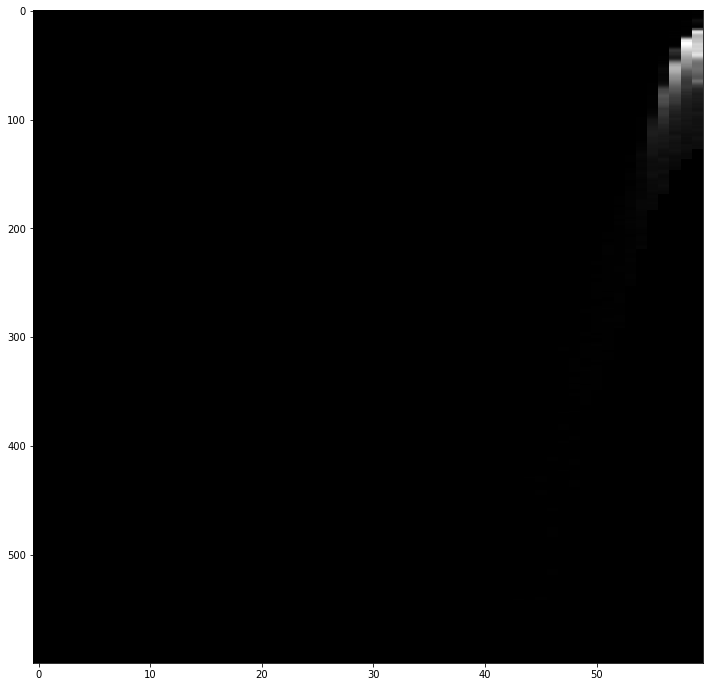

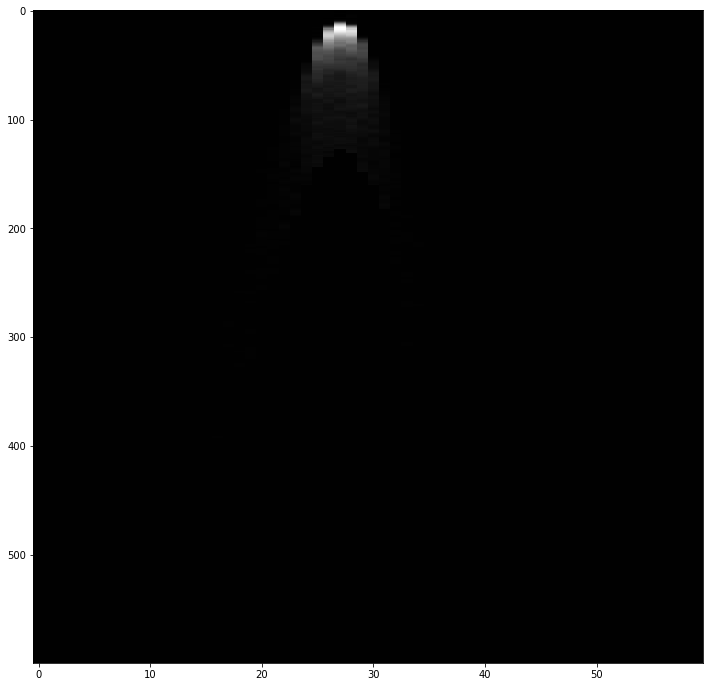

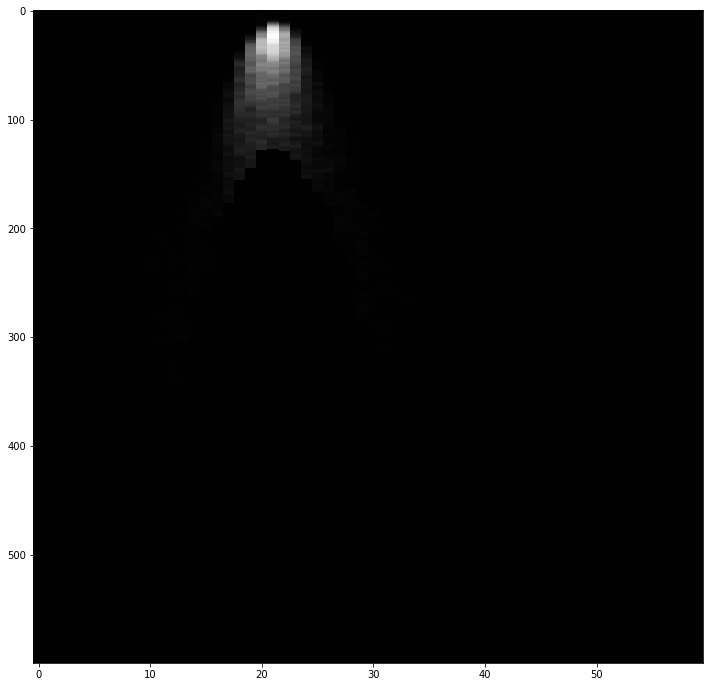

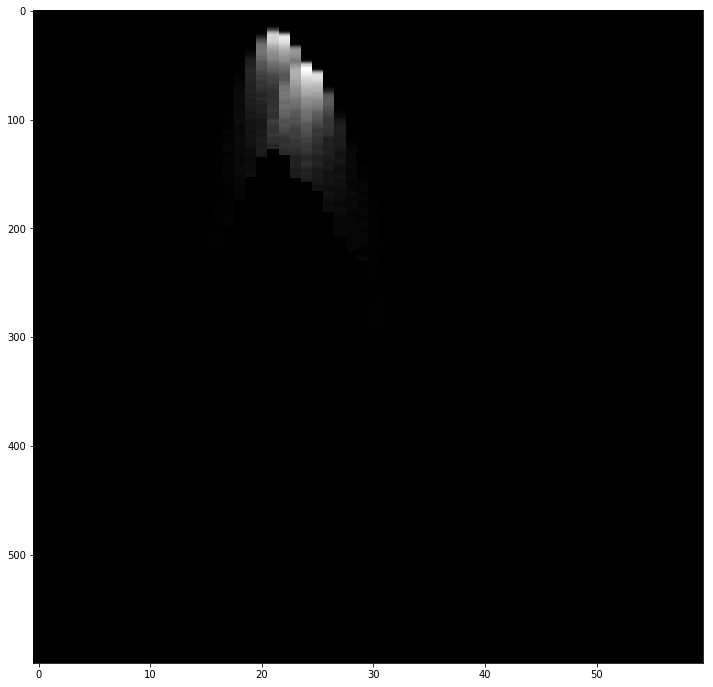

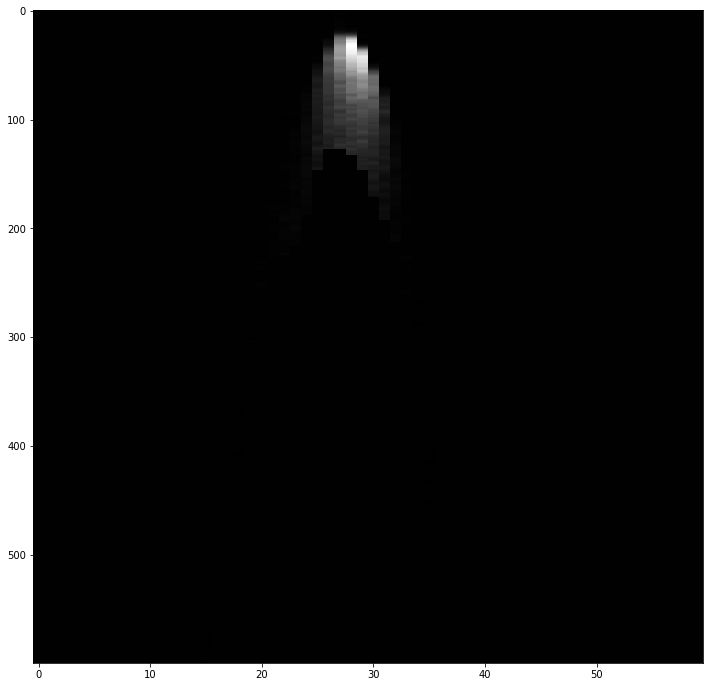

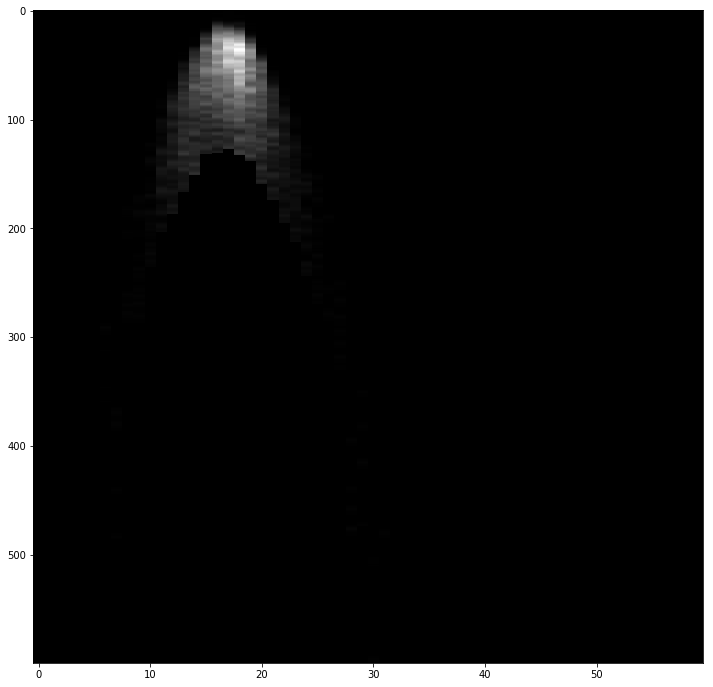

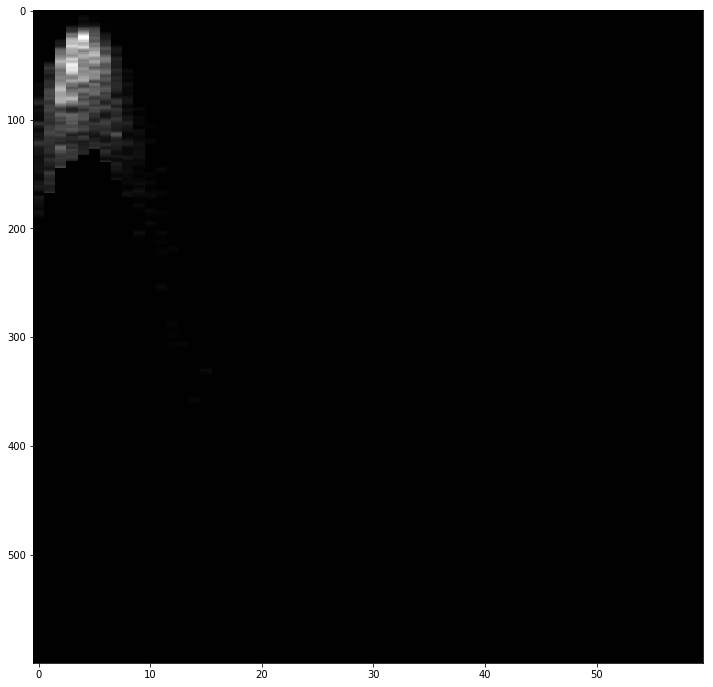

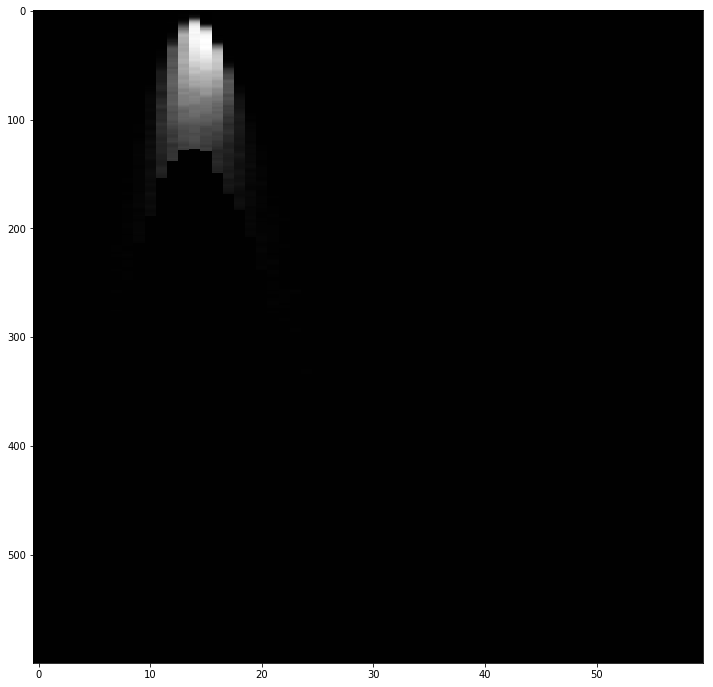

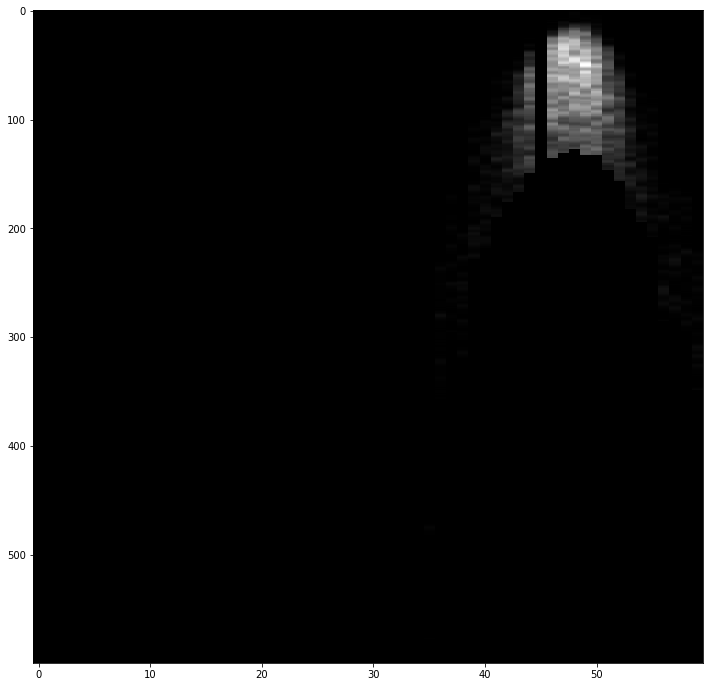

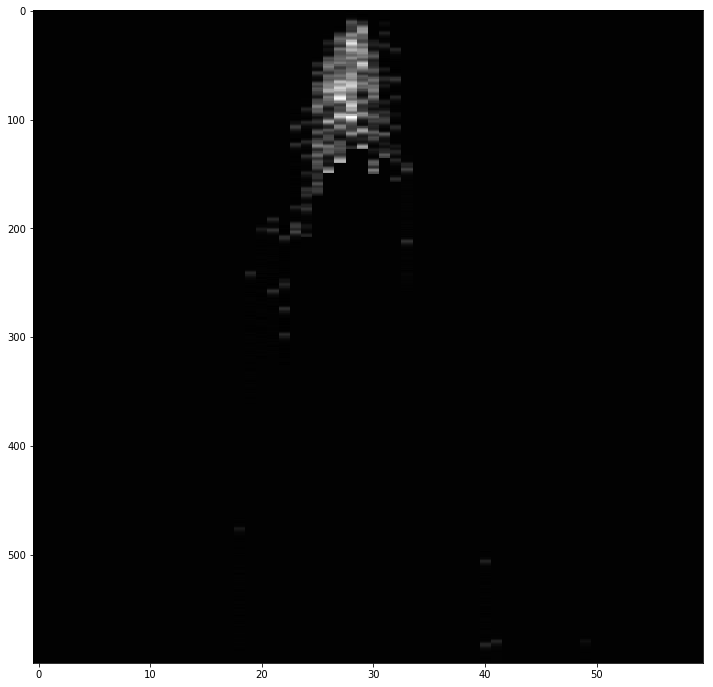

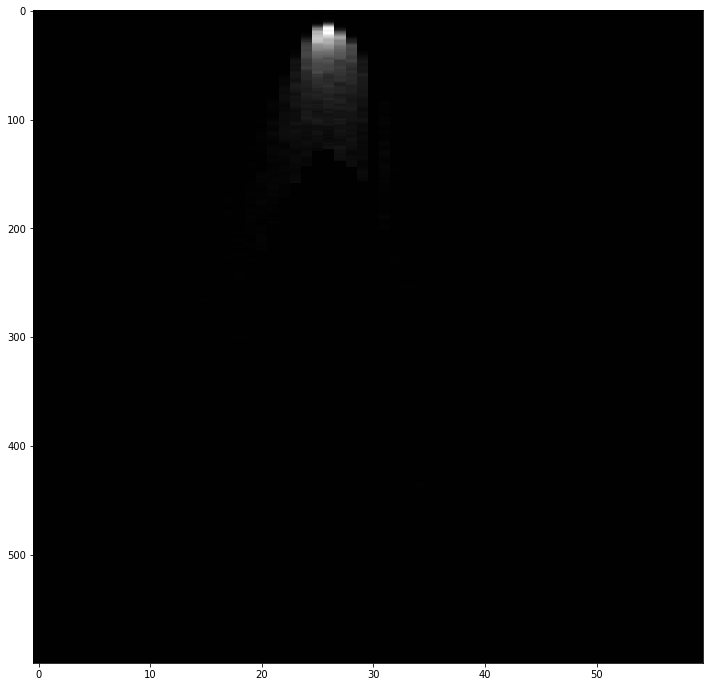

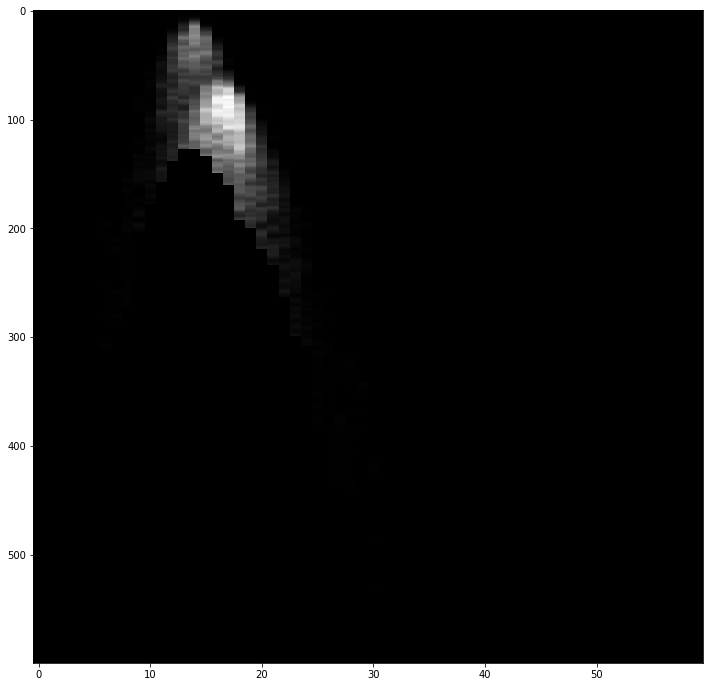

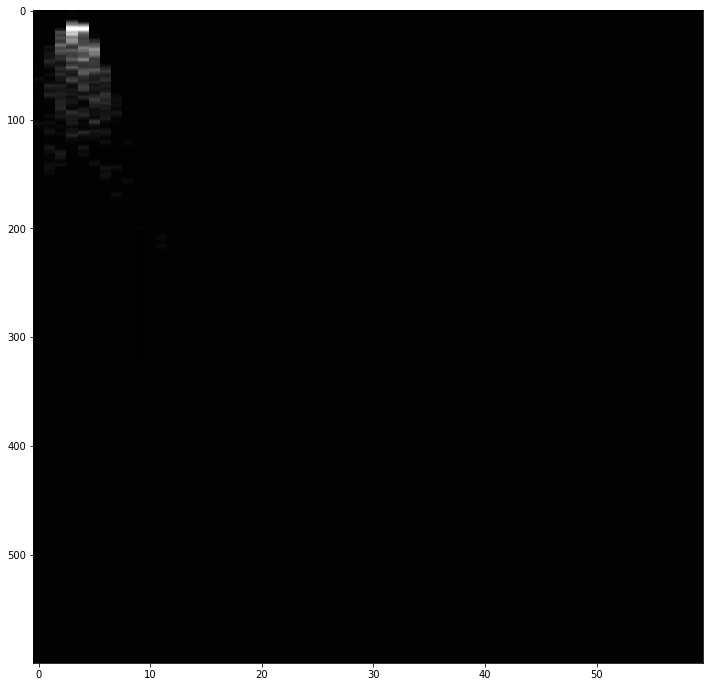

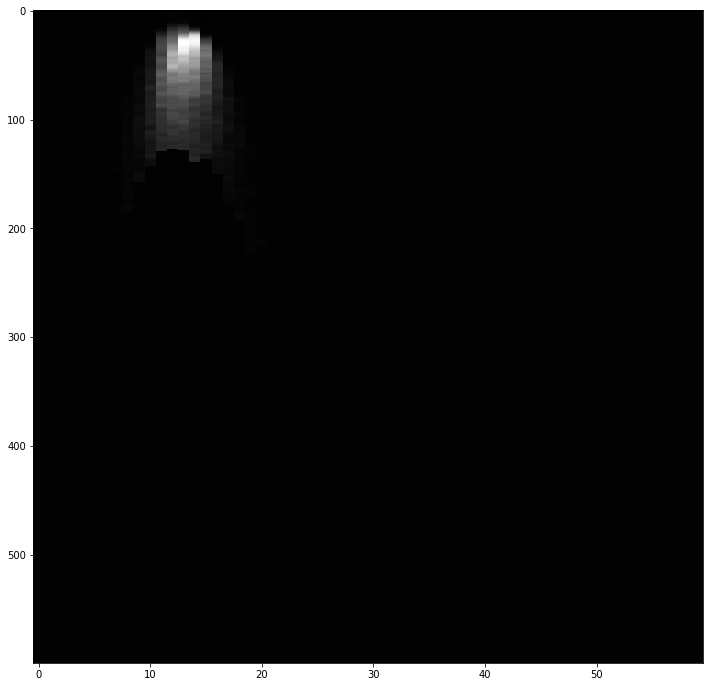

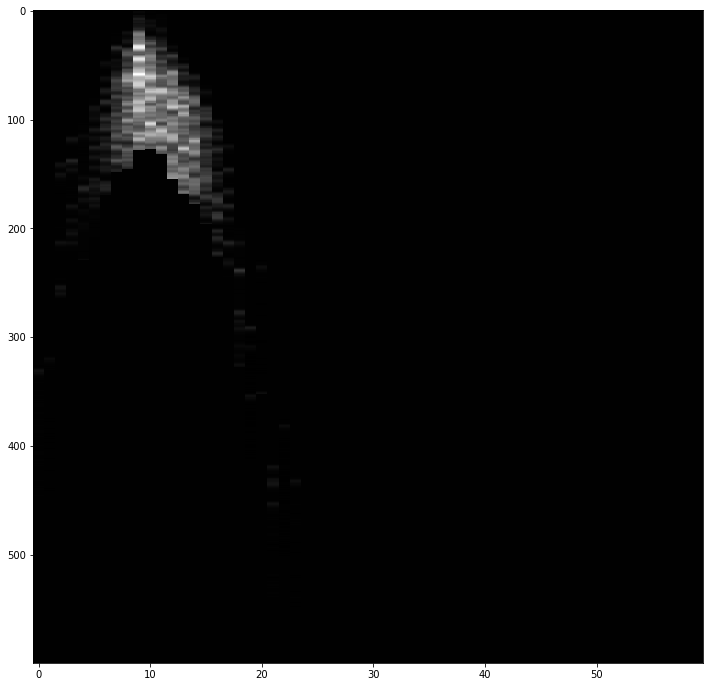

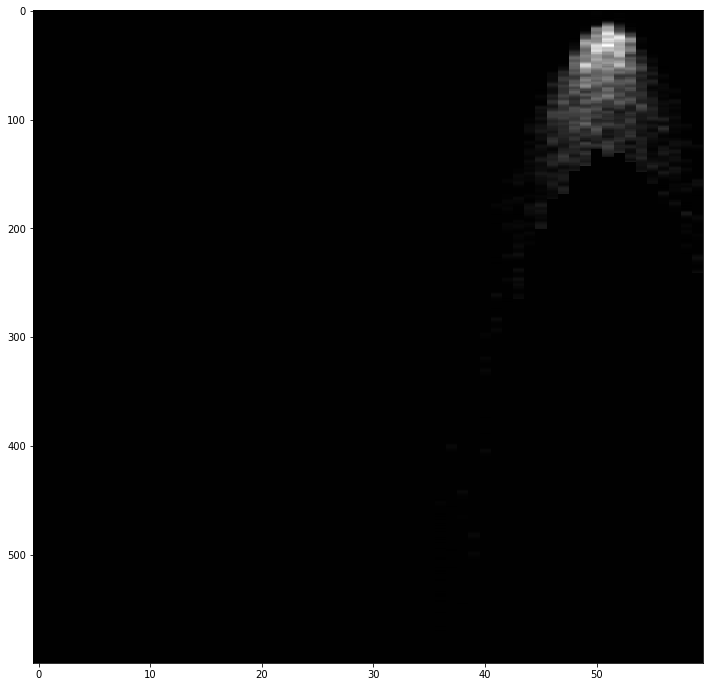

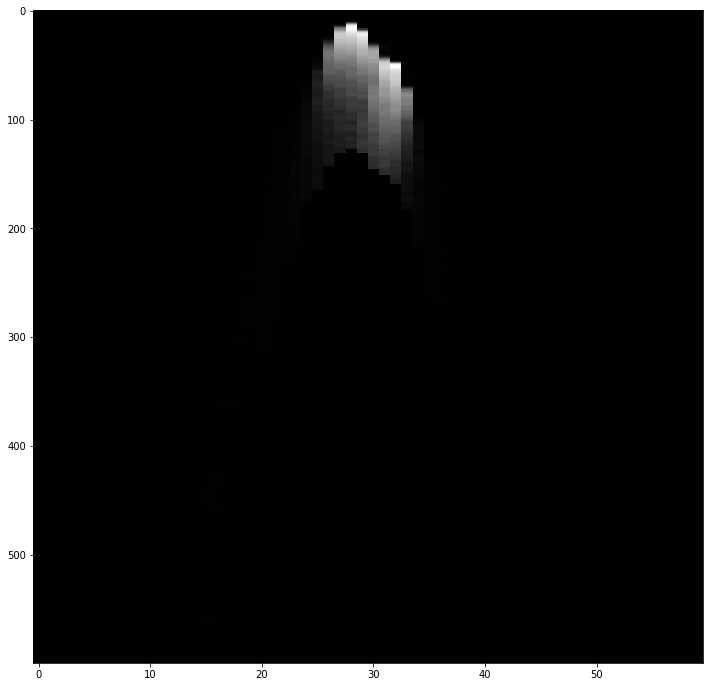

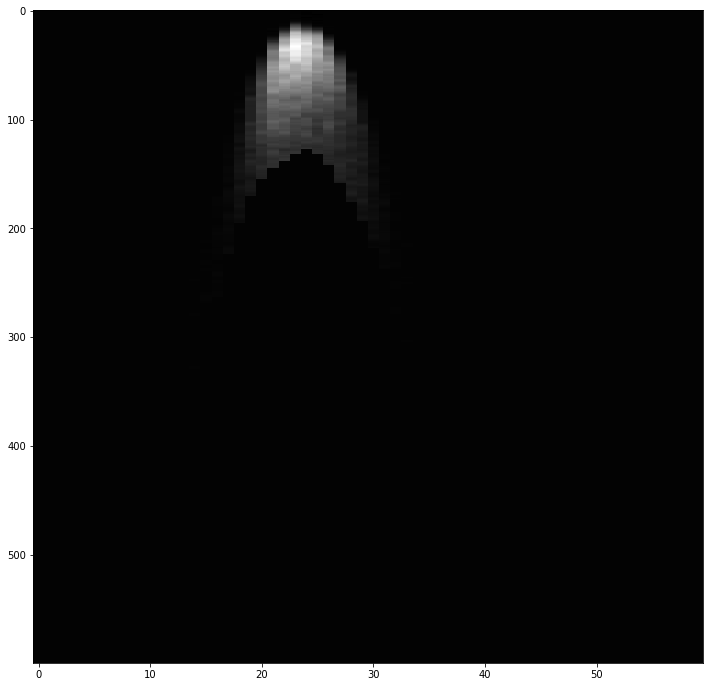

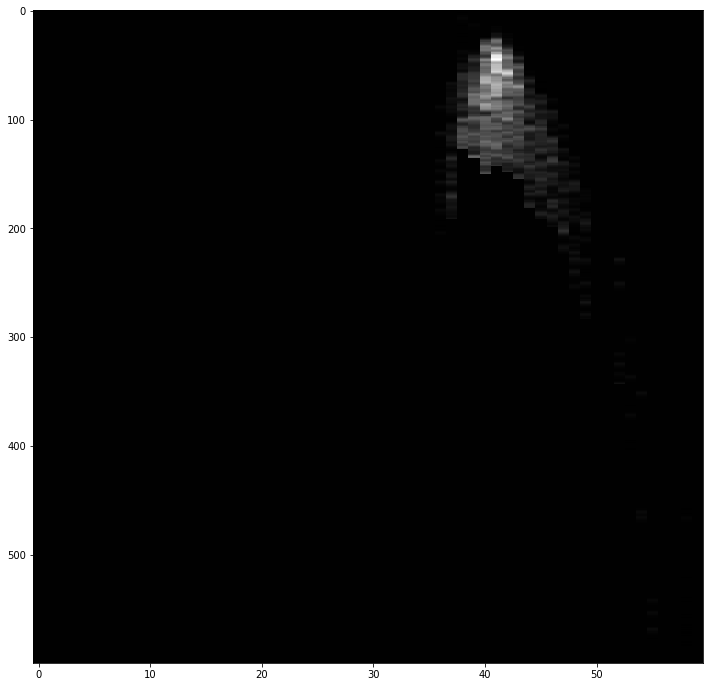

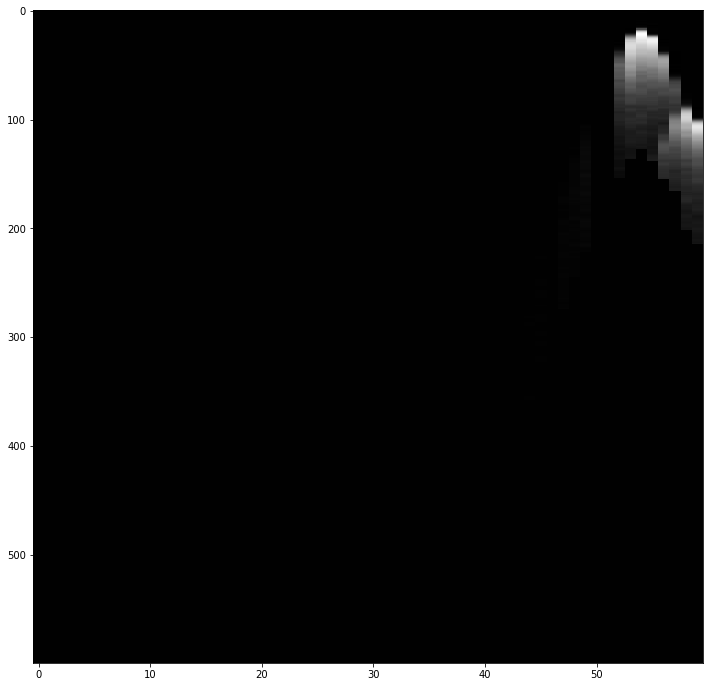

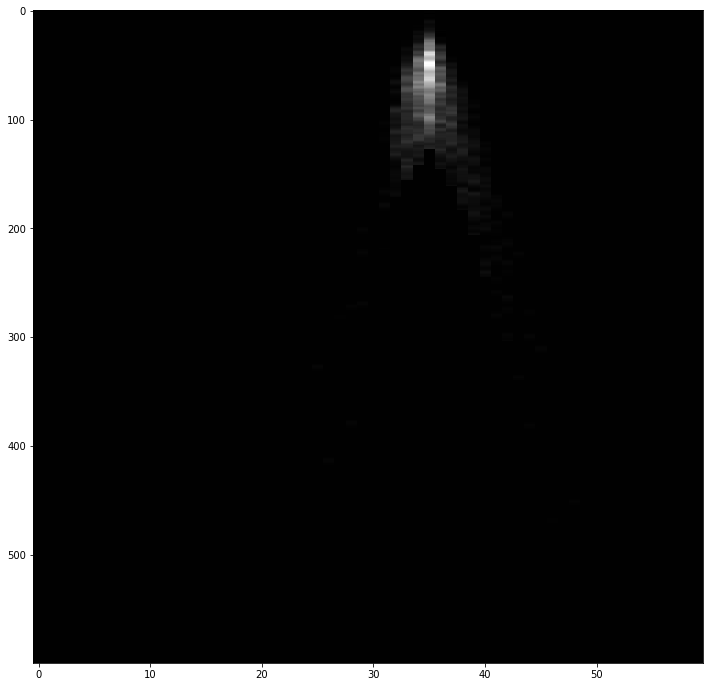

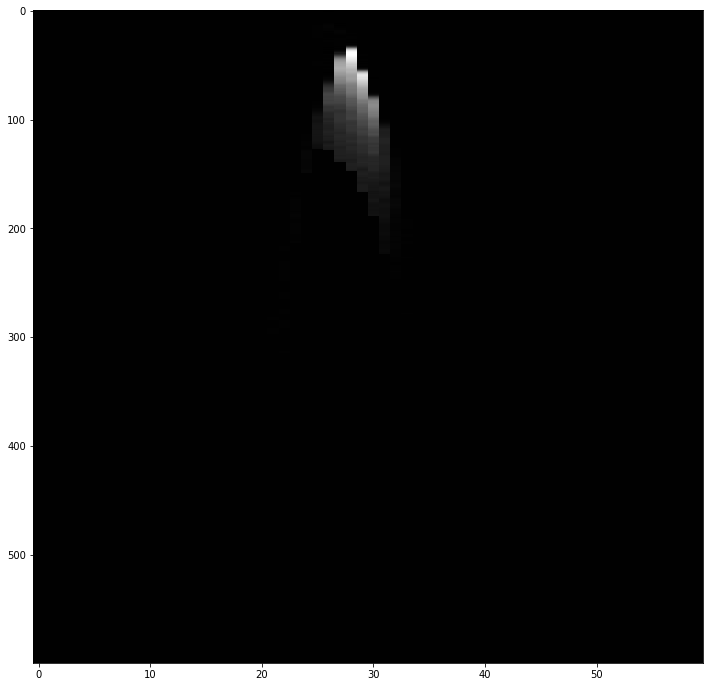

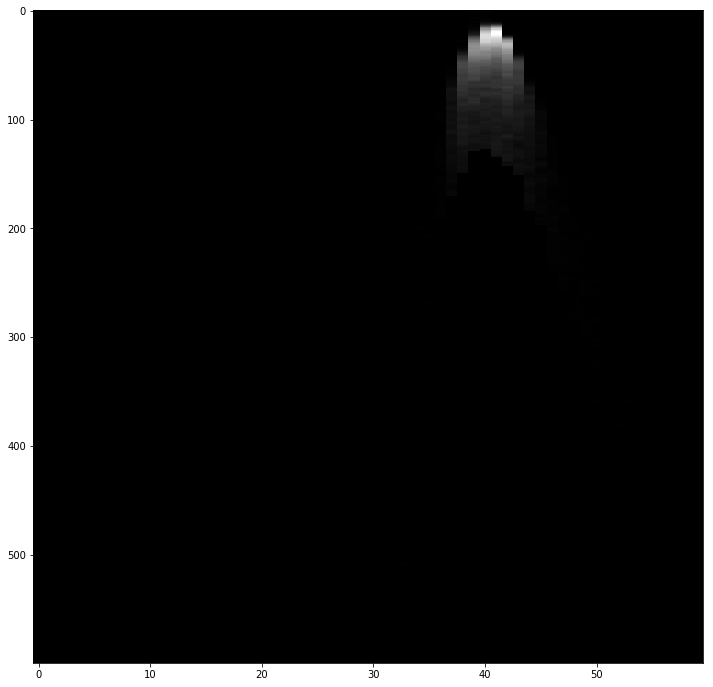

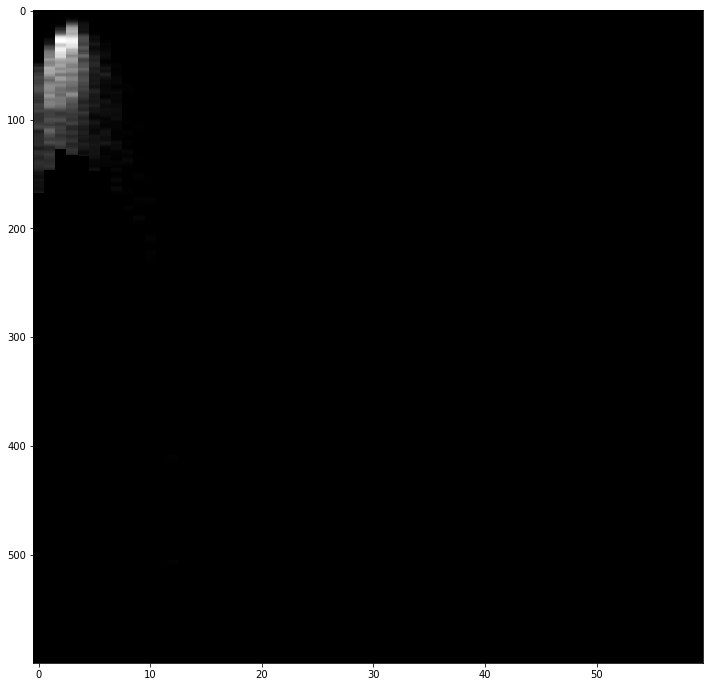

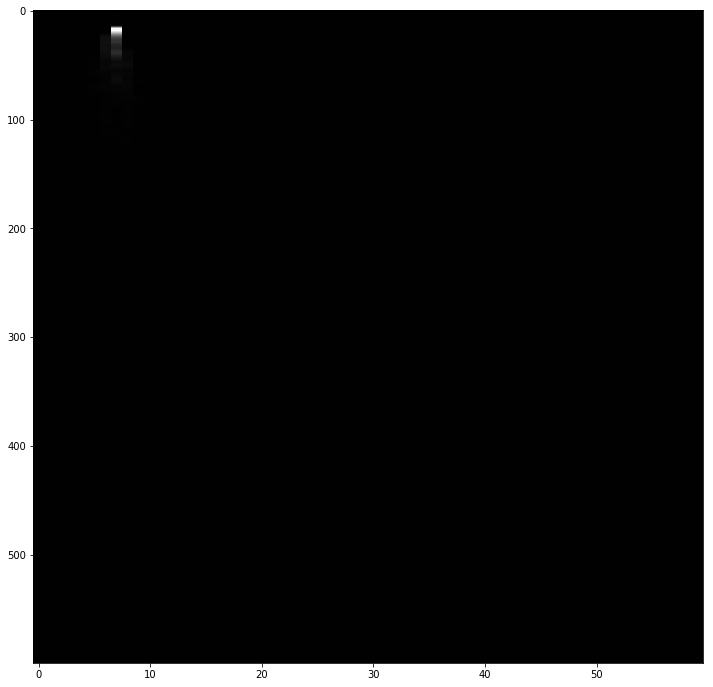

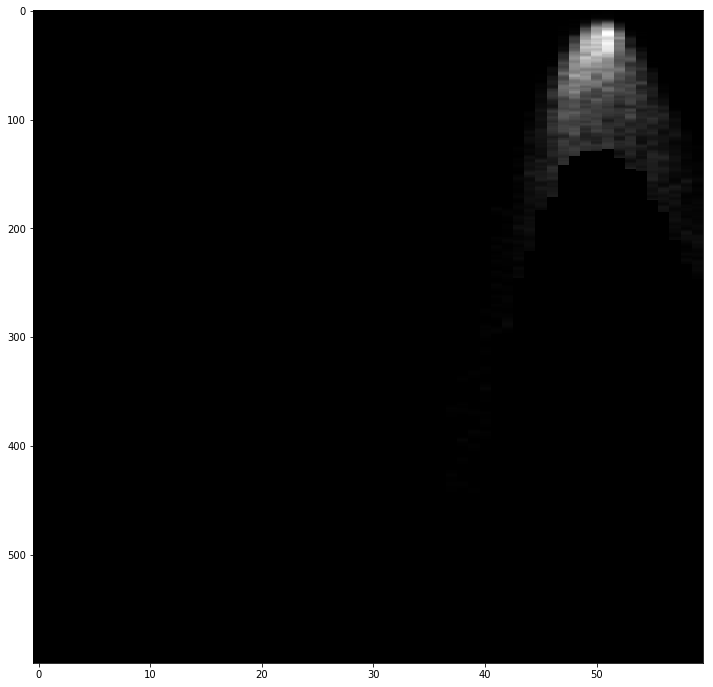

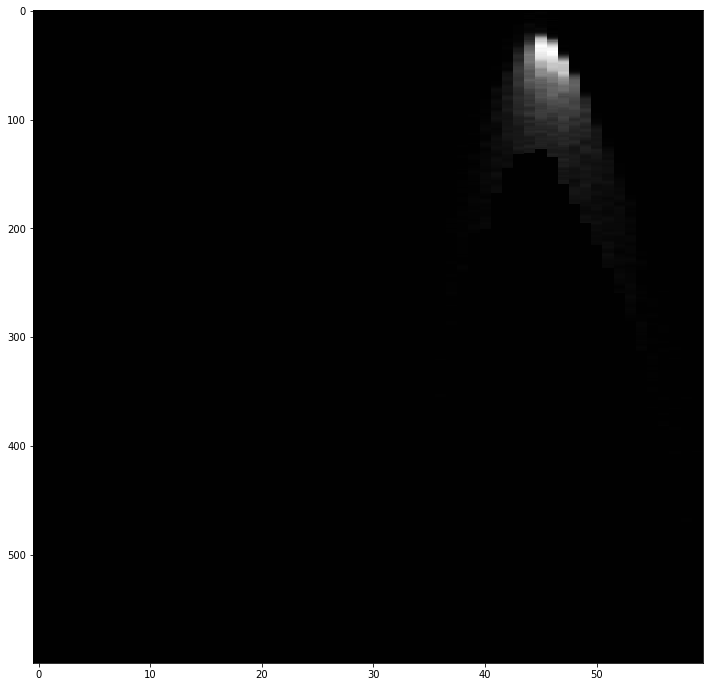

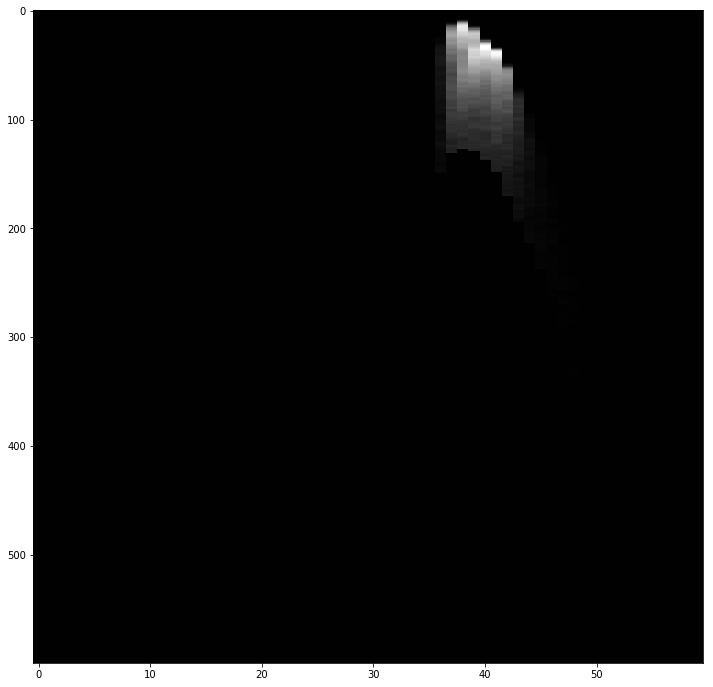

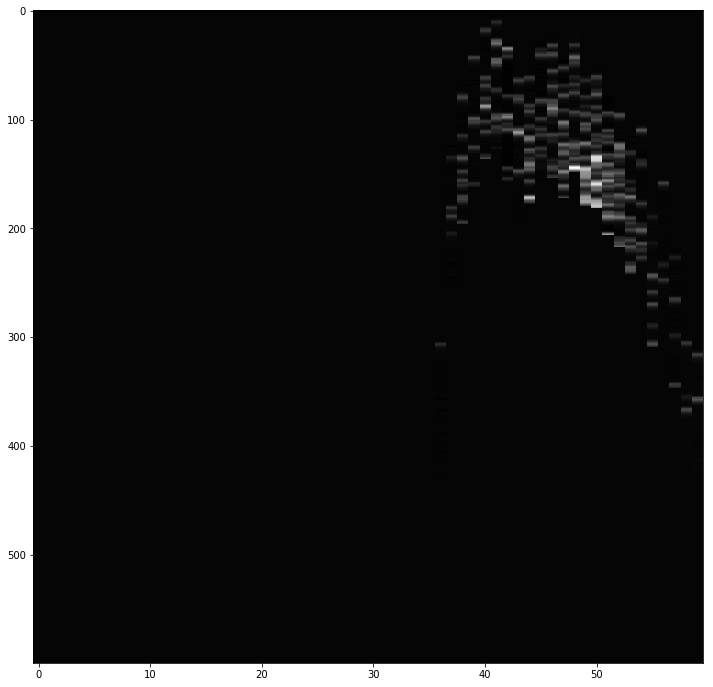

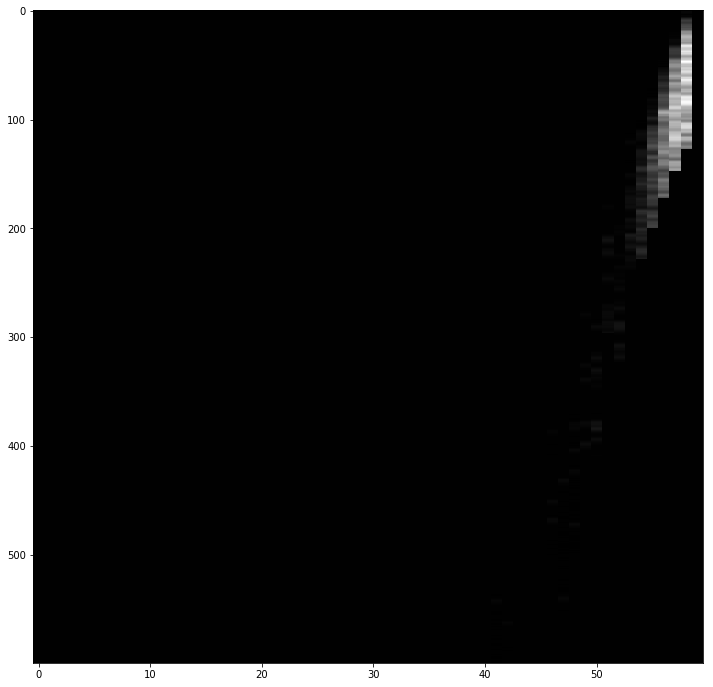

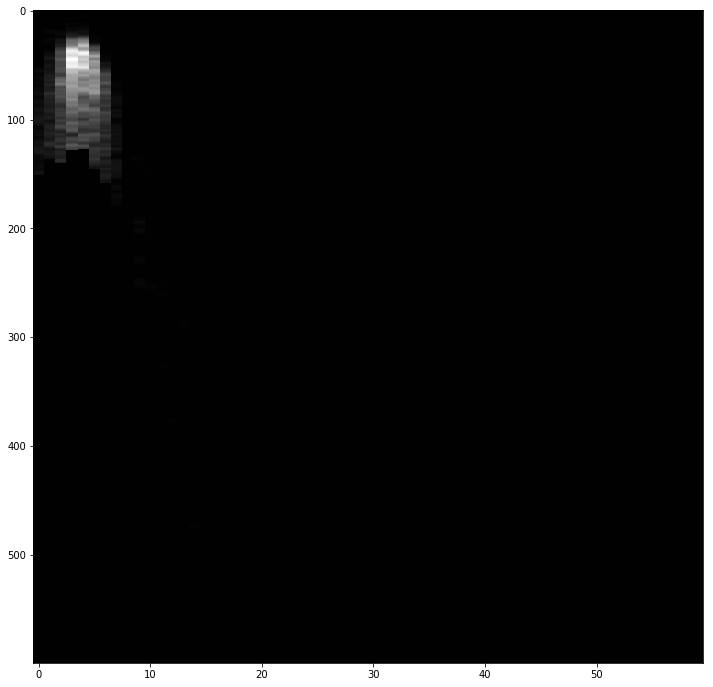

In [20]:
for im in data_d[:100]:
    print(im.shape)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'gray')
    #ax.plot(im[14,:])
    #print(im[:,46])